# How to convert a list of addresses into a map

### 1. Puntos Limpios Móviles
### 2. Oficinas de la Agencia Tributaria (using web scraping)

----------------------------------------------------

## 1. Puntos Limpios Móviles (without web scraping)
The other day, I wanted to recycle an old mobile phone, so I was looking for places nearby where I live. And I found a lot of addresses, but in text, there was no map, and I am really bad at remembering street names. So I thought that it must be a way to visualize that, and it was. It felt so good to be able to do it.






Note: After completing this project, I found out there was a map.
But it's slower, and it's not integrated with Google Maps, so you don't have navigation assistance. And you cannot filter by days either.


Source data: [web](https://https://www.madrid.es/portales/munimadrid/es/Inicio/Medio-ambiente/Recogida-de-residuos/Punto-Limpio-Movil-del-Ayuntamiento-de-Madrid-Distrito-de-Centro/?vgnextfmt=default&vgnextoid=931db8412d652110VgnVCM1000000b205a0aRCRD&vgnextchannel=f81379ed268fe410VgnVCM1000000b205a0aRCRD)



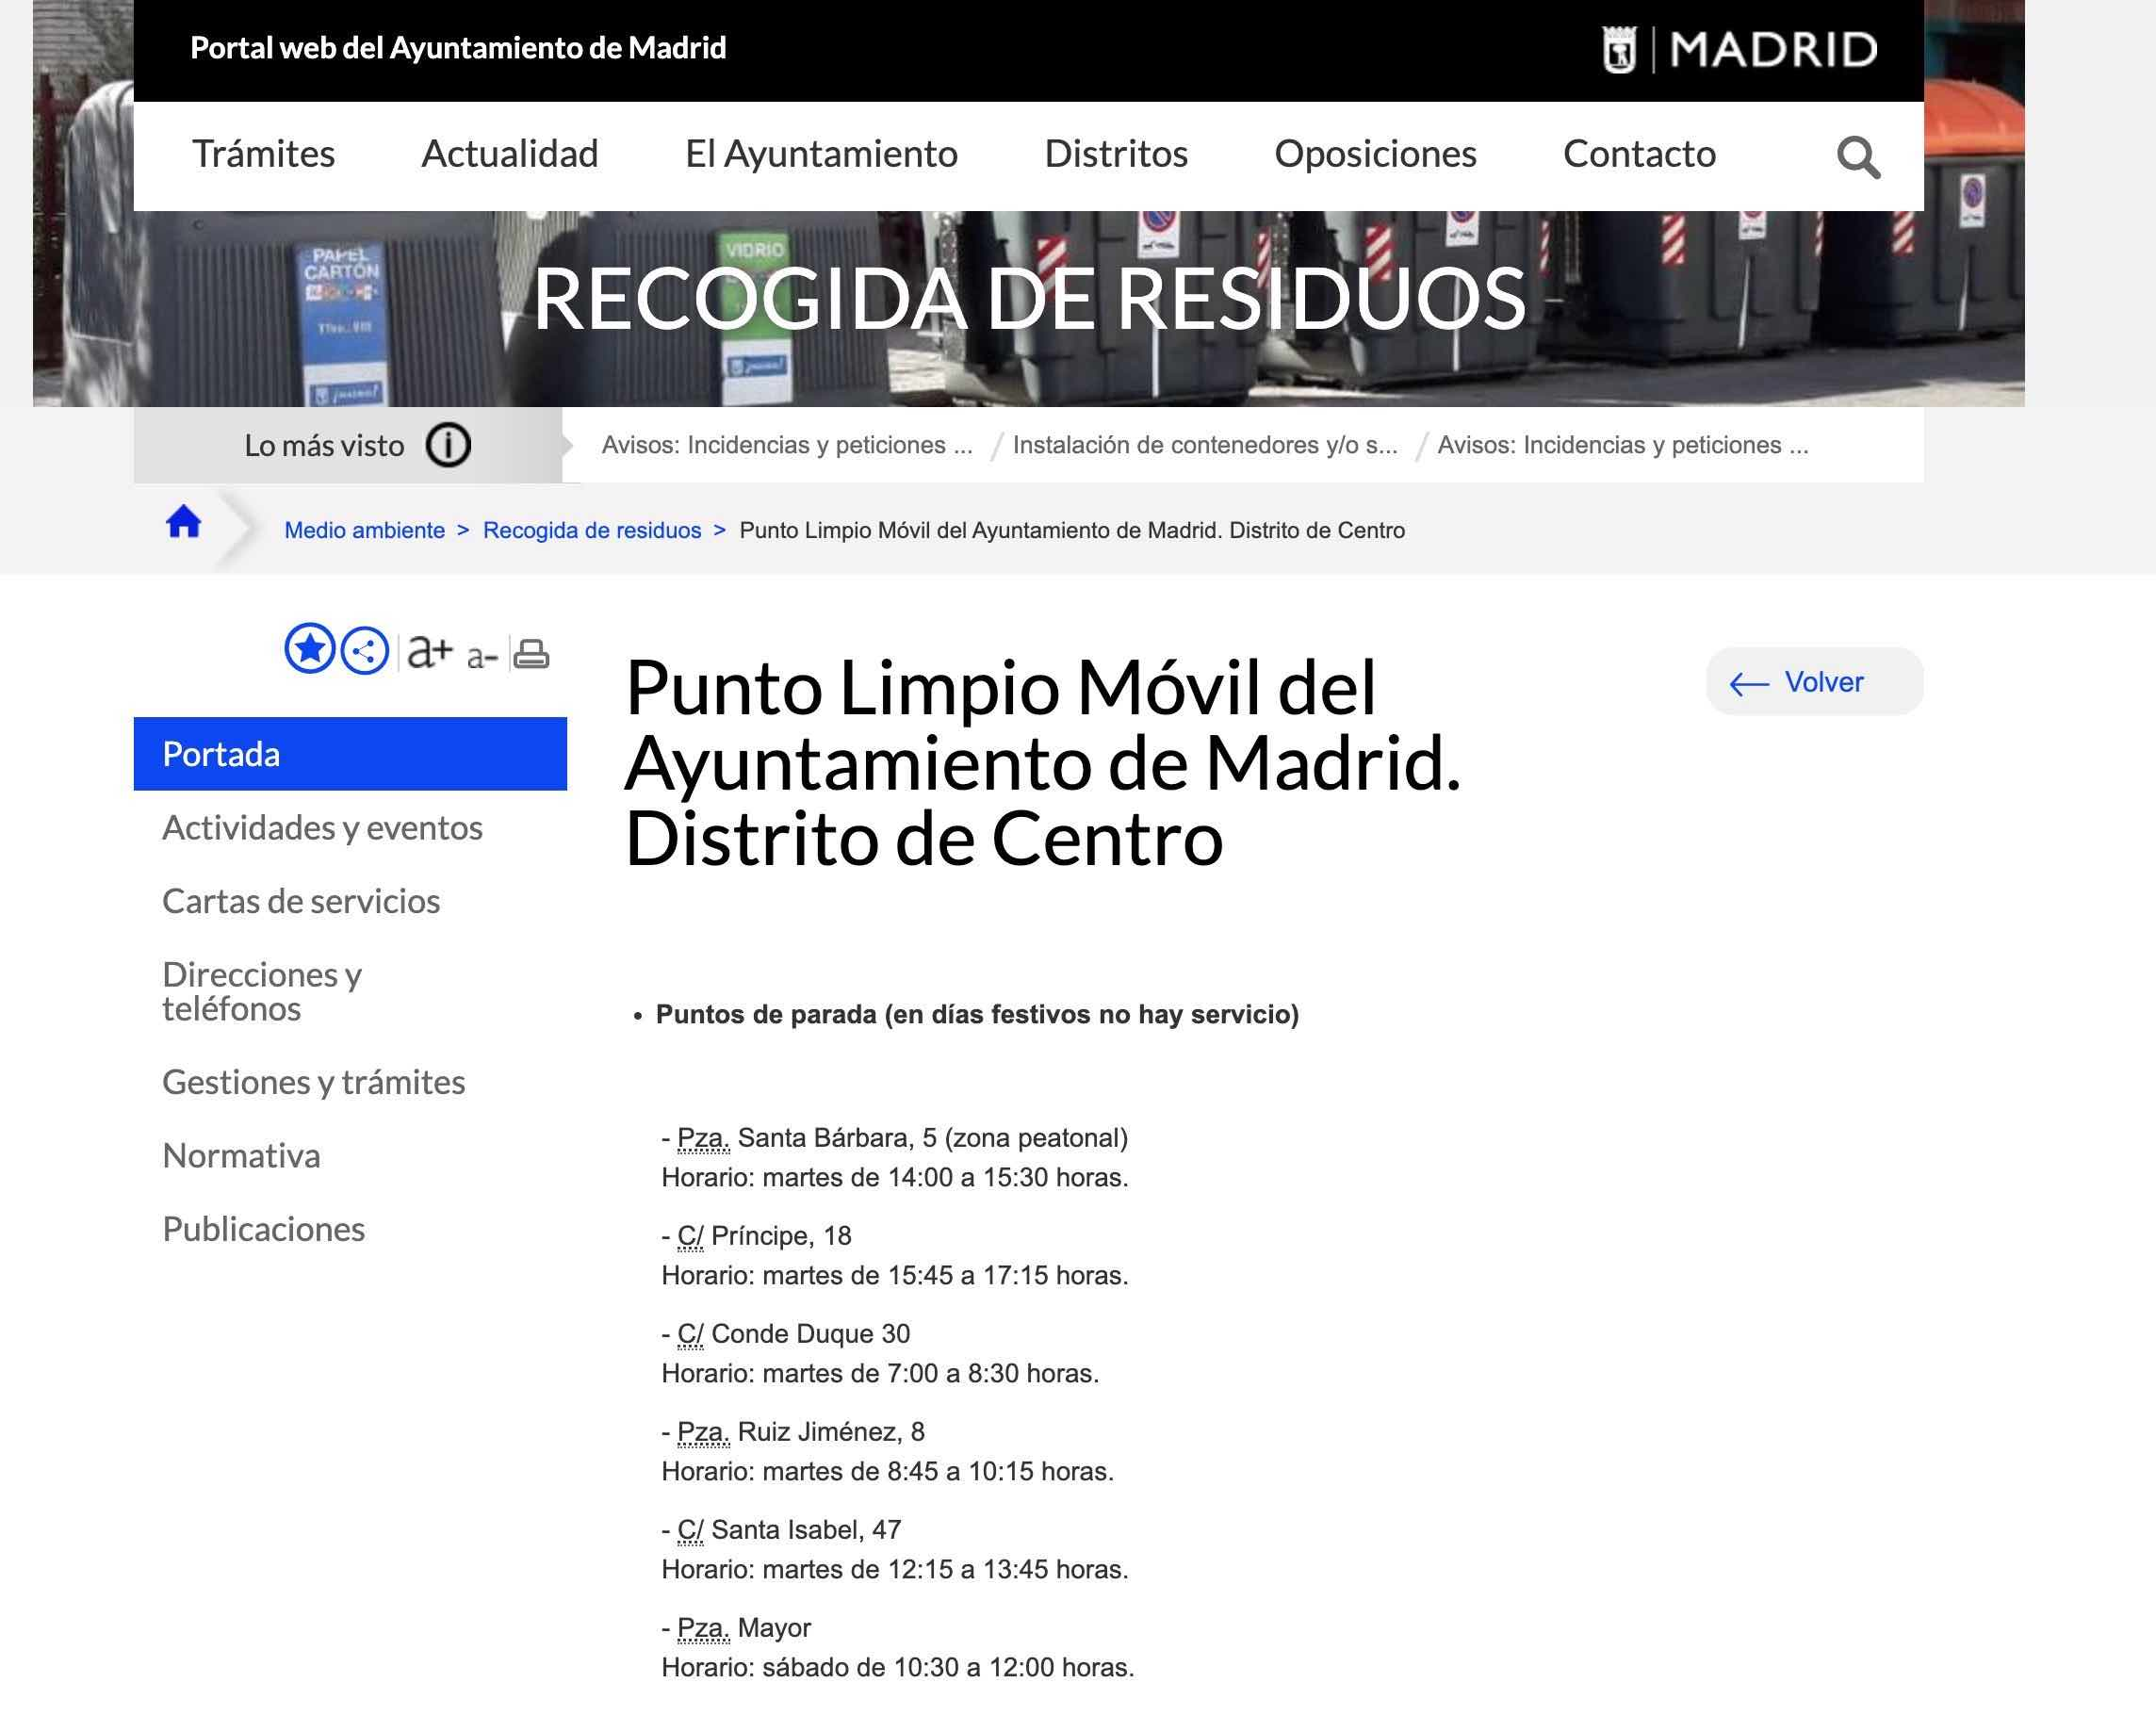

Paste it in Google Sheet to clean it.

To add Madrid to the addresses that don't have it (to avoid problems later in Google My Maps)

- FIND() to see if the cell contains 'Madrid'

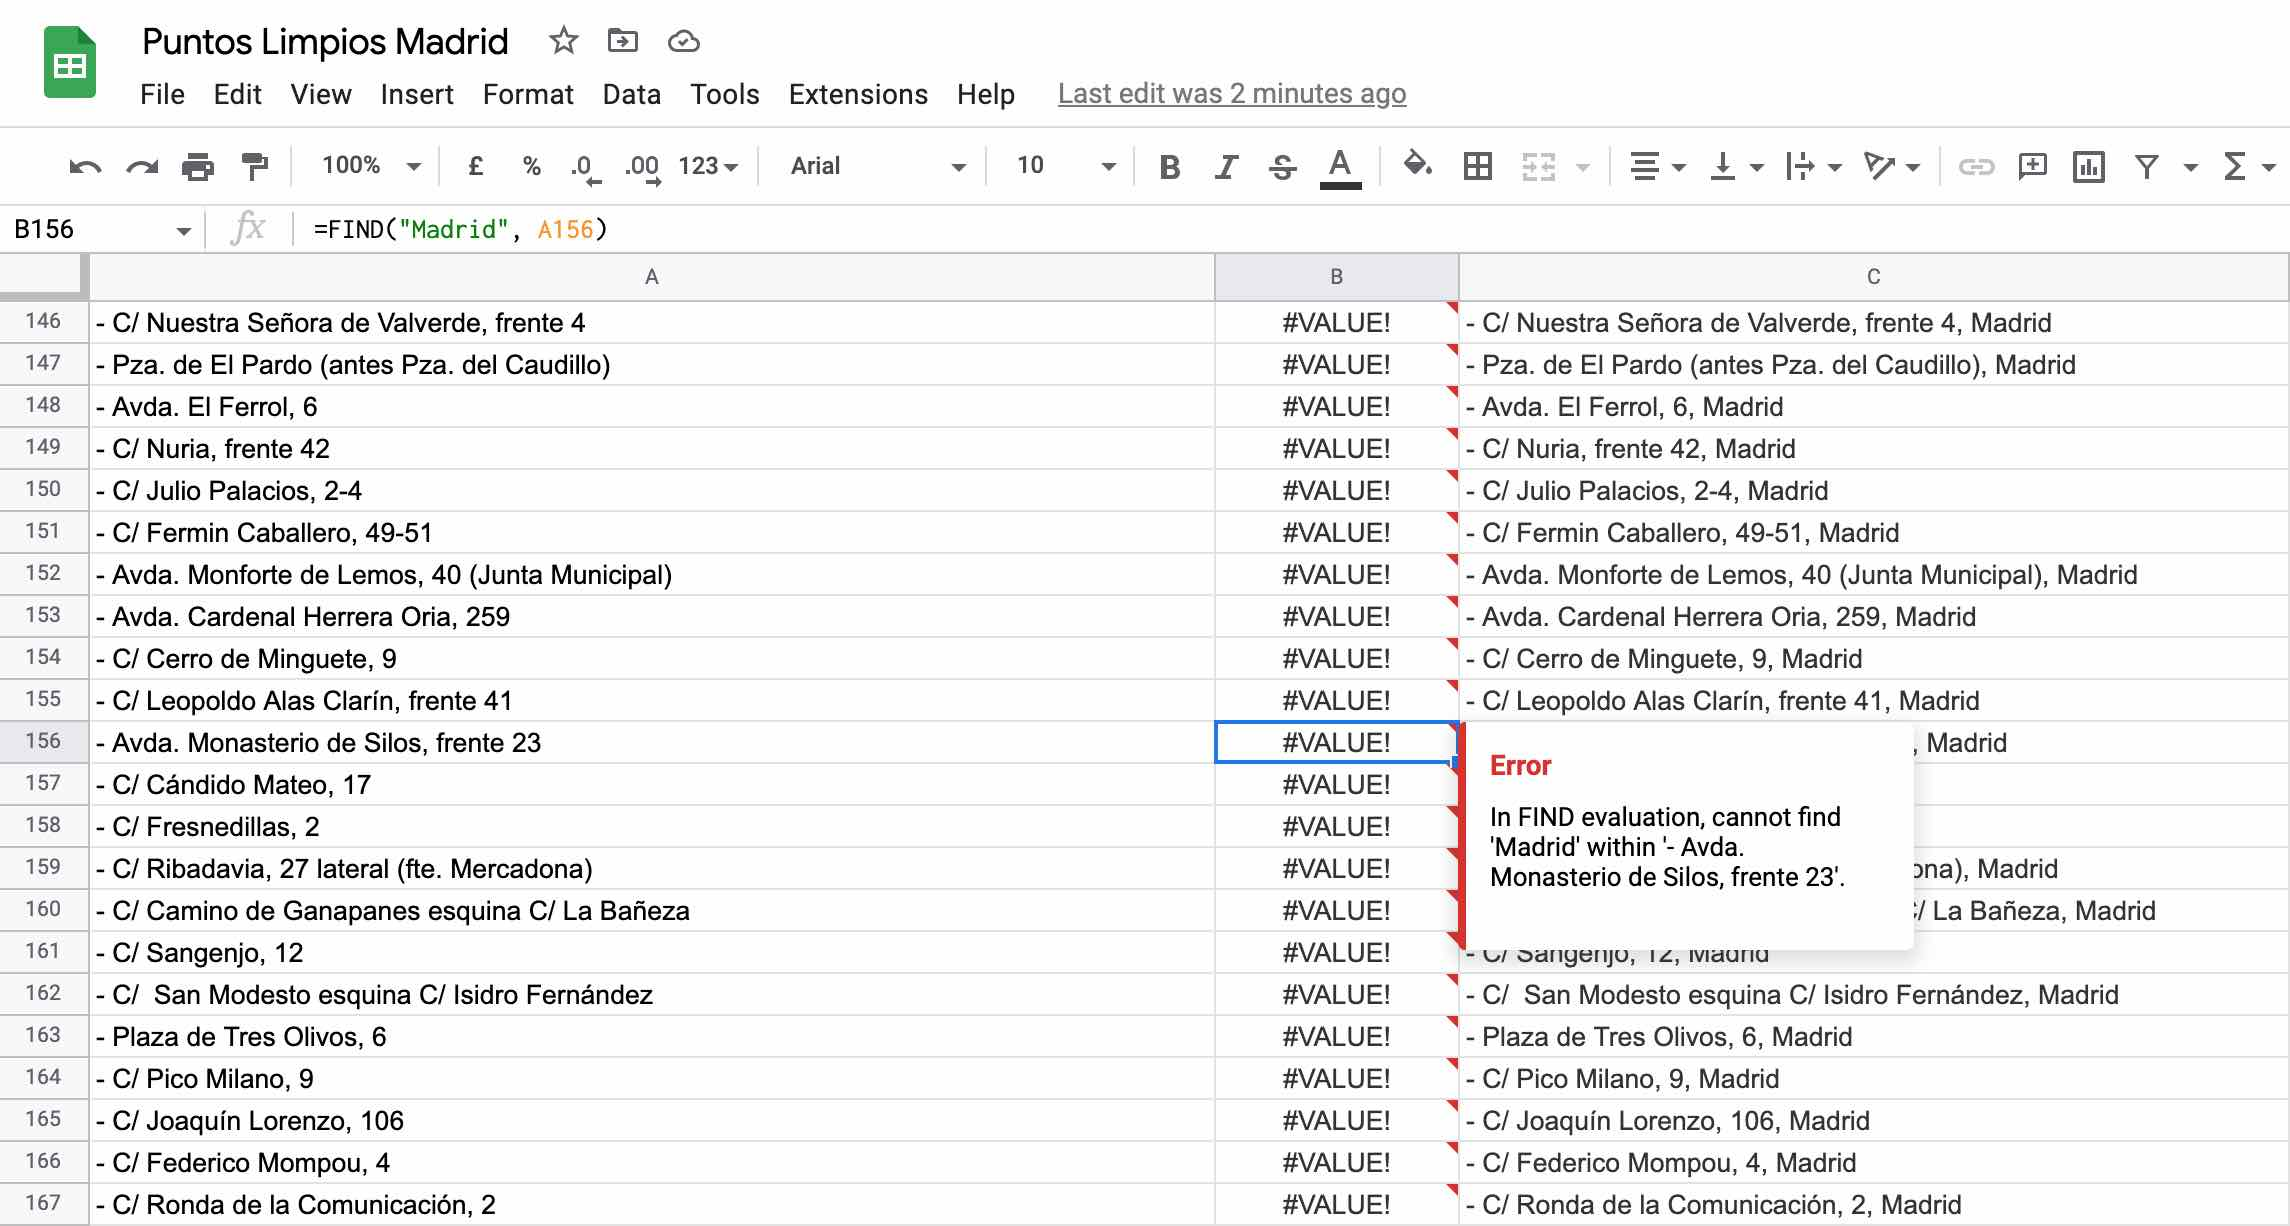

- IFERROR() if the cell has no value, we'll use CONCATENATE to add 'Madrid' 

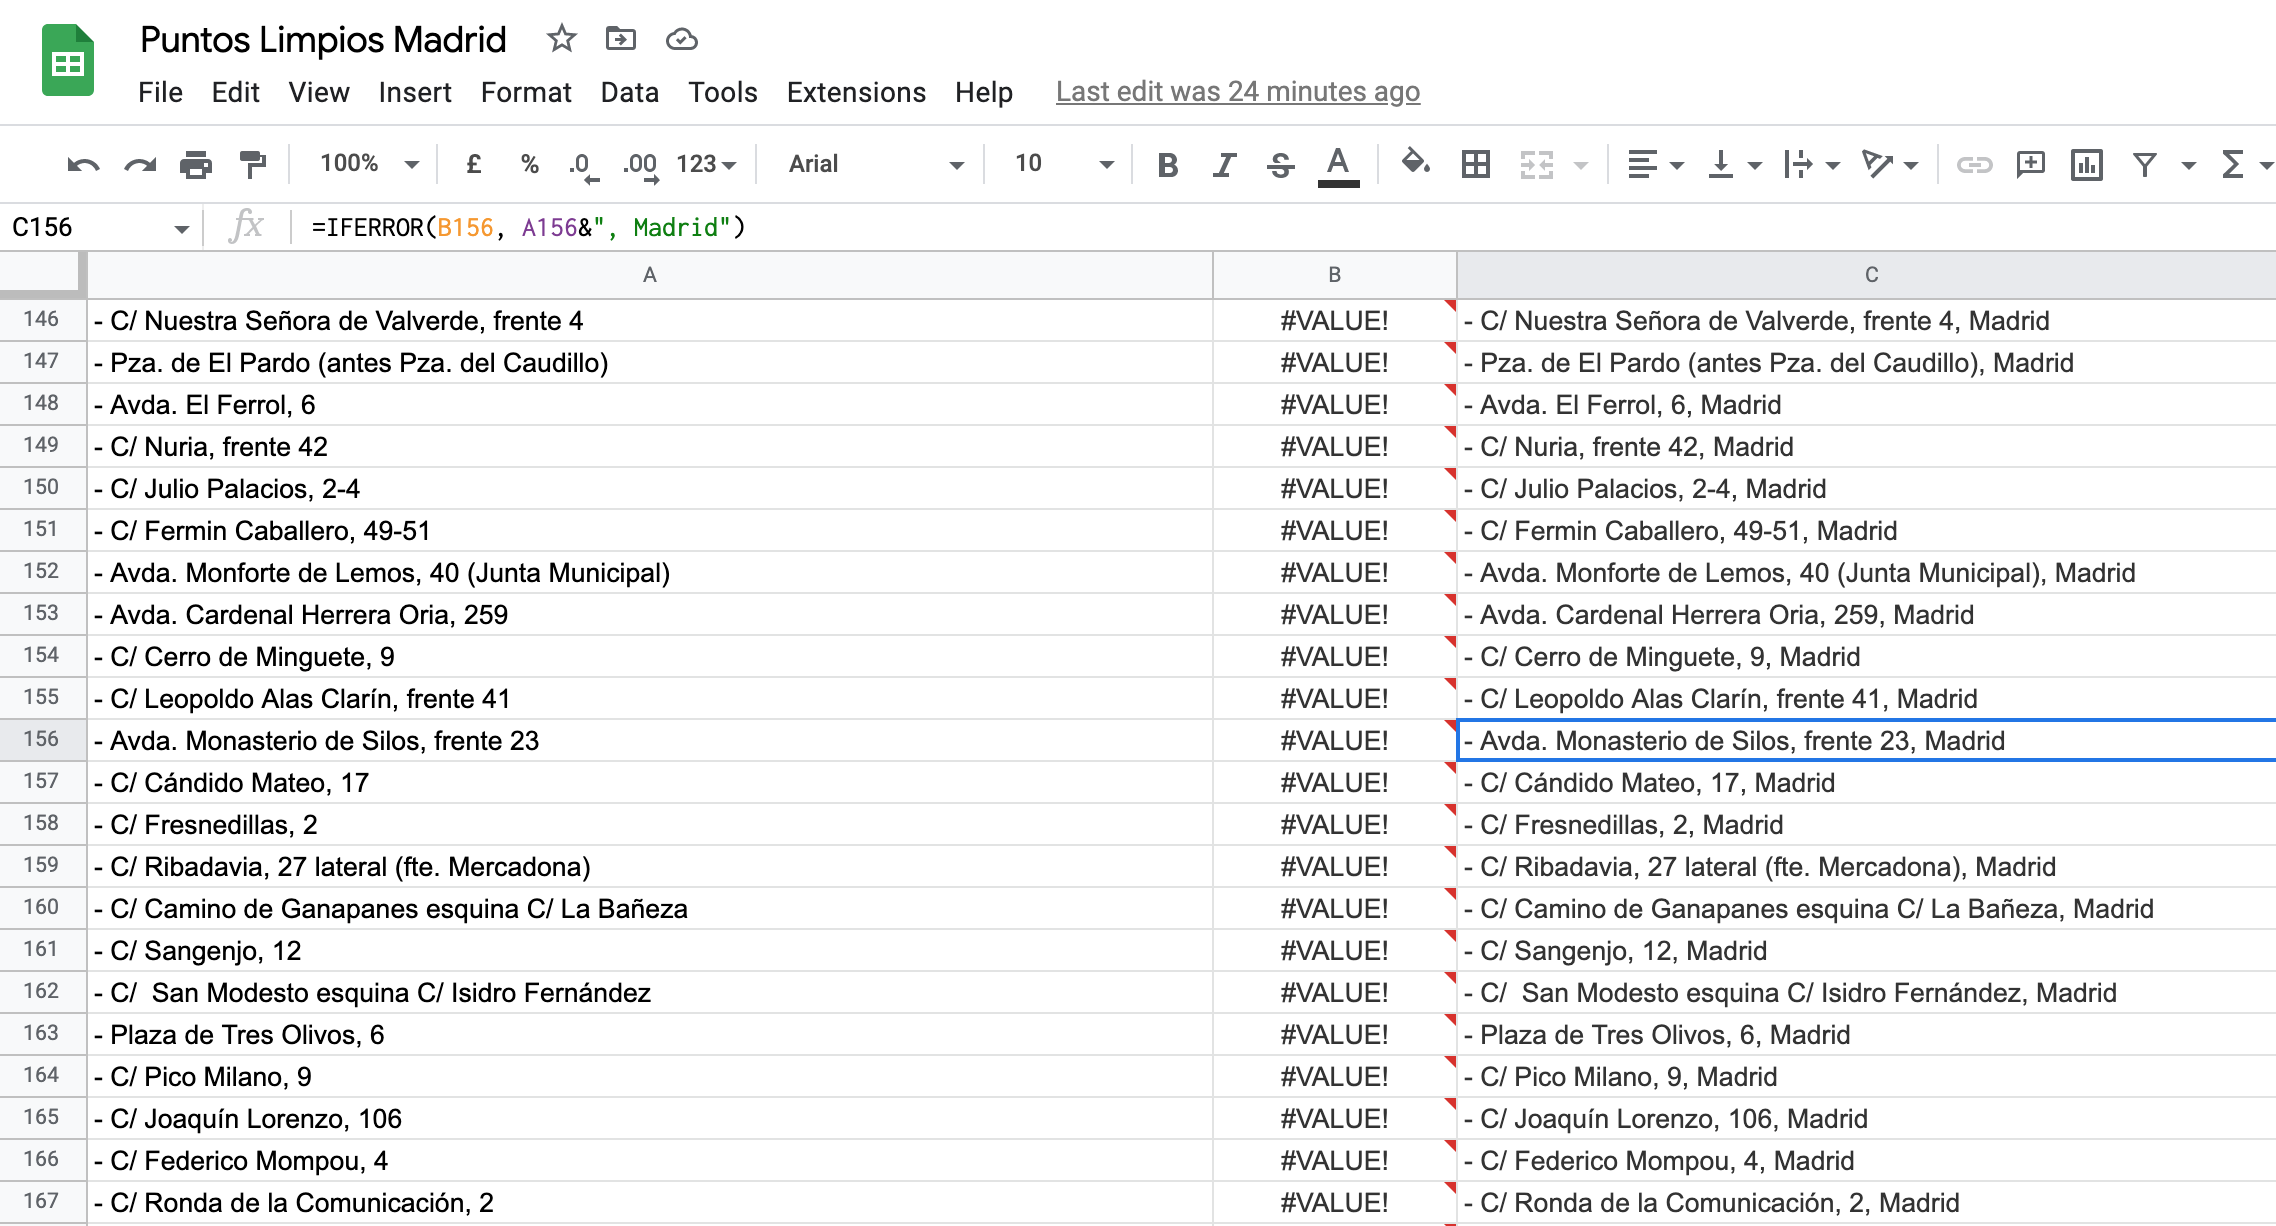

To remove "Horario:"

=RIGHT(B2, LEN(B2)-9)

To check de Day

=REGEXEXTRACT(C2,"[^[:space:]]+")

To check if it has "de"

=LEFT(C2, FIND("de", C2)+3)

To add "de"

=LEFT(C2,FIND(" ", C2)) & " de" & RIGHT(C2,21)

To remove dot at the end of the string

=LEFT(C2, LEN(C2)-1)

To Lowercase

=LOWER(D2)

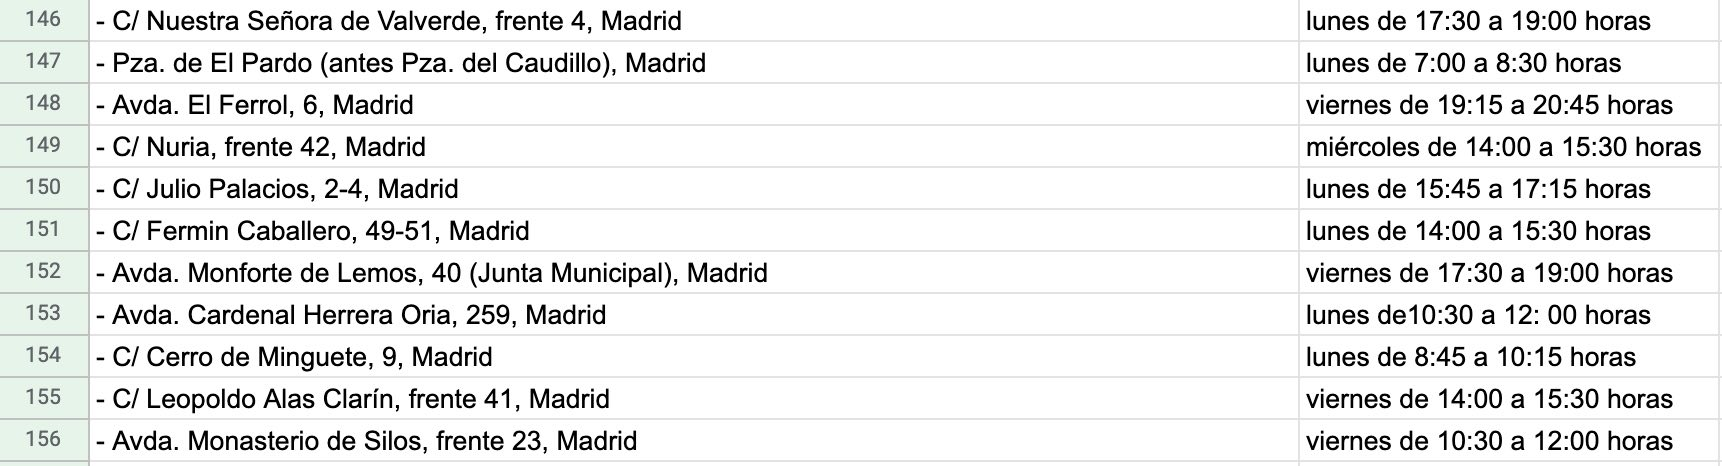

Then we will use Google My Maps, connecting the sheet that we've just created.

But some rows couldn't be shown on the map.

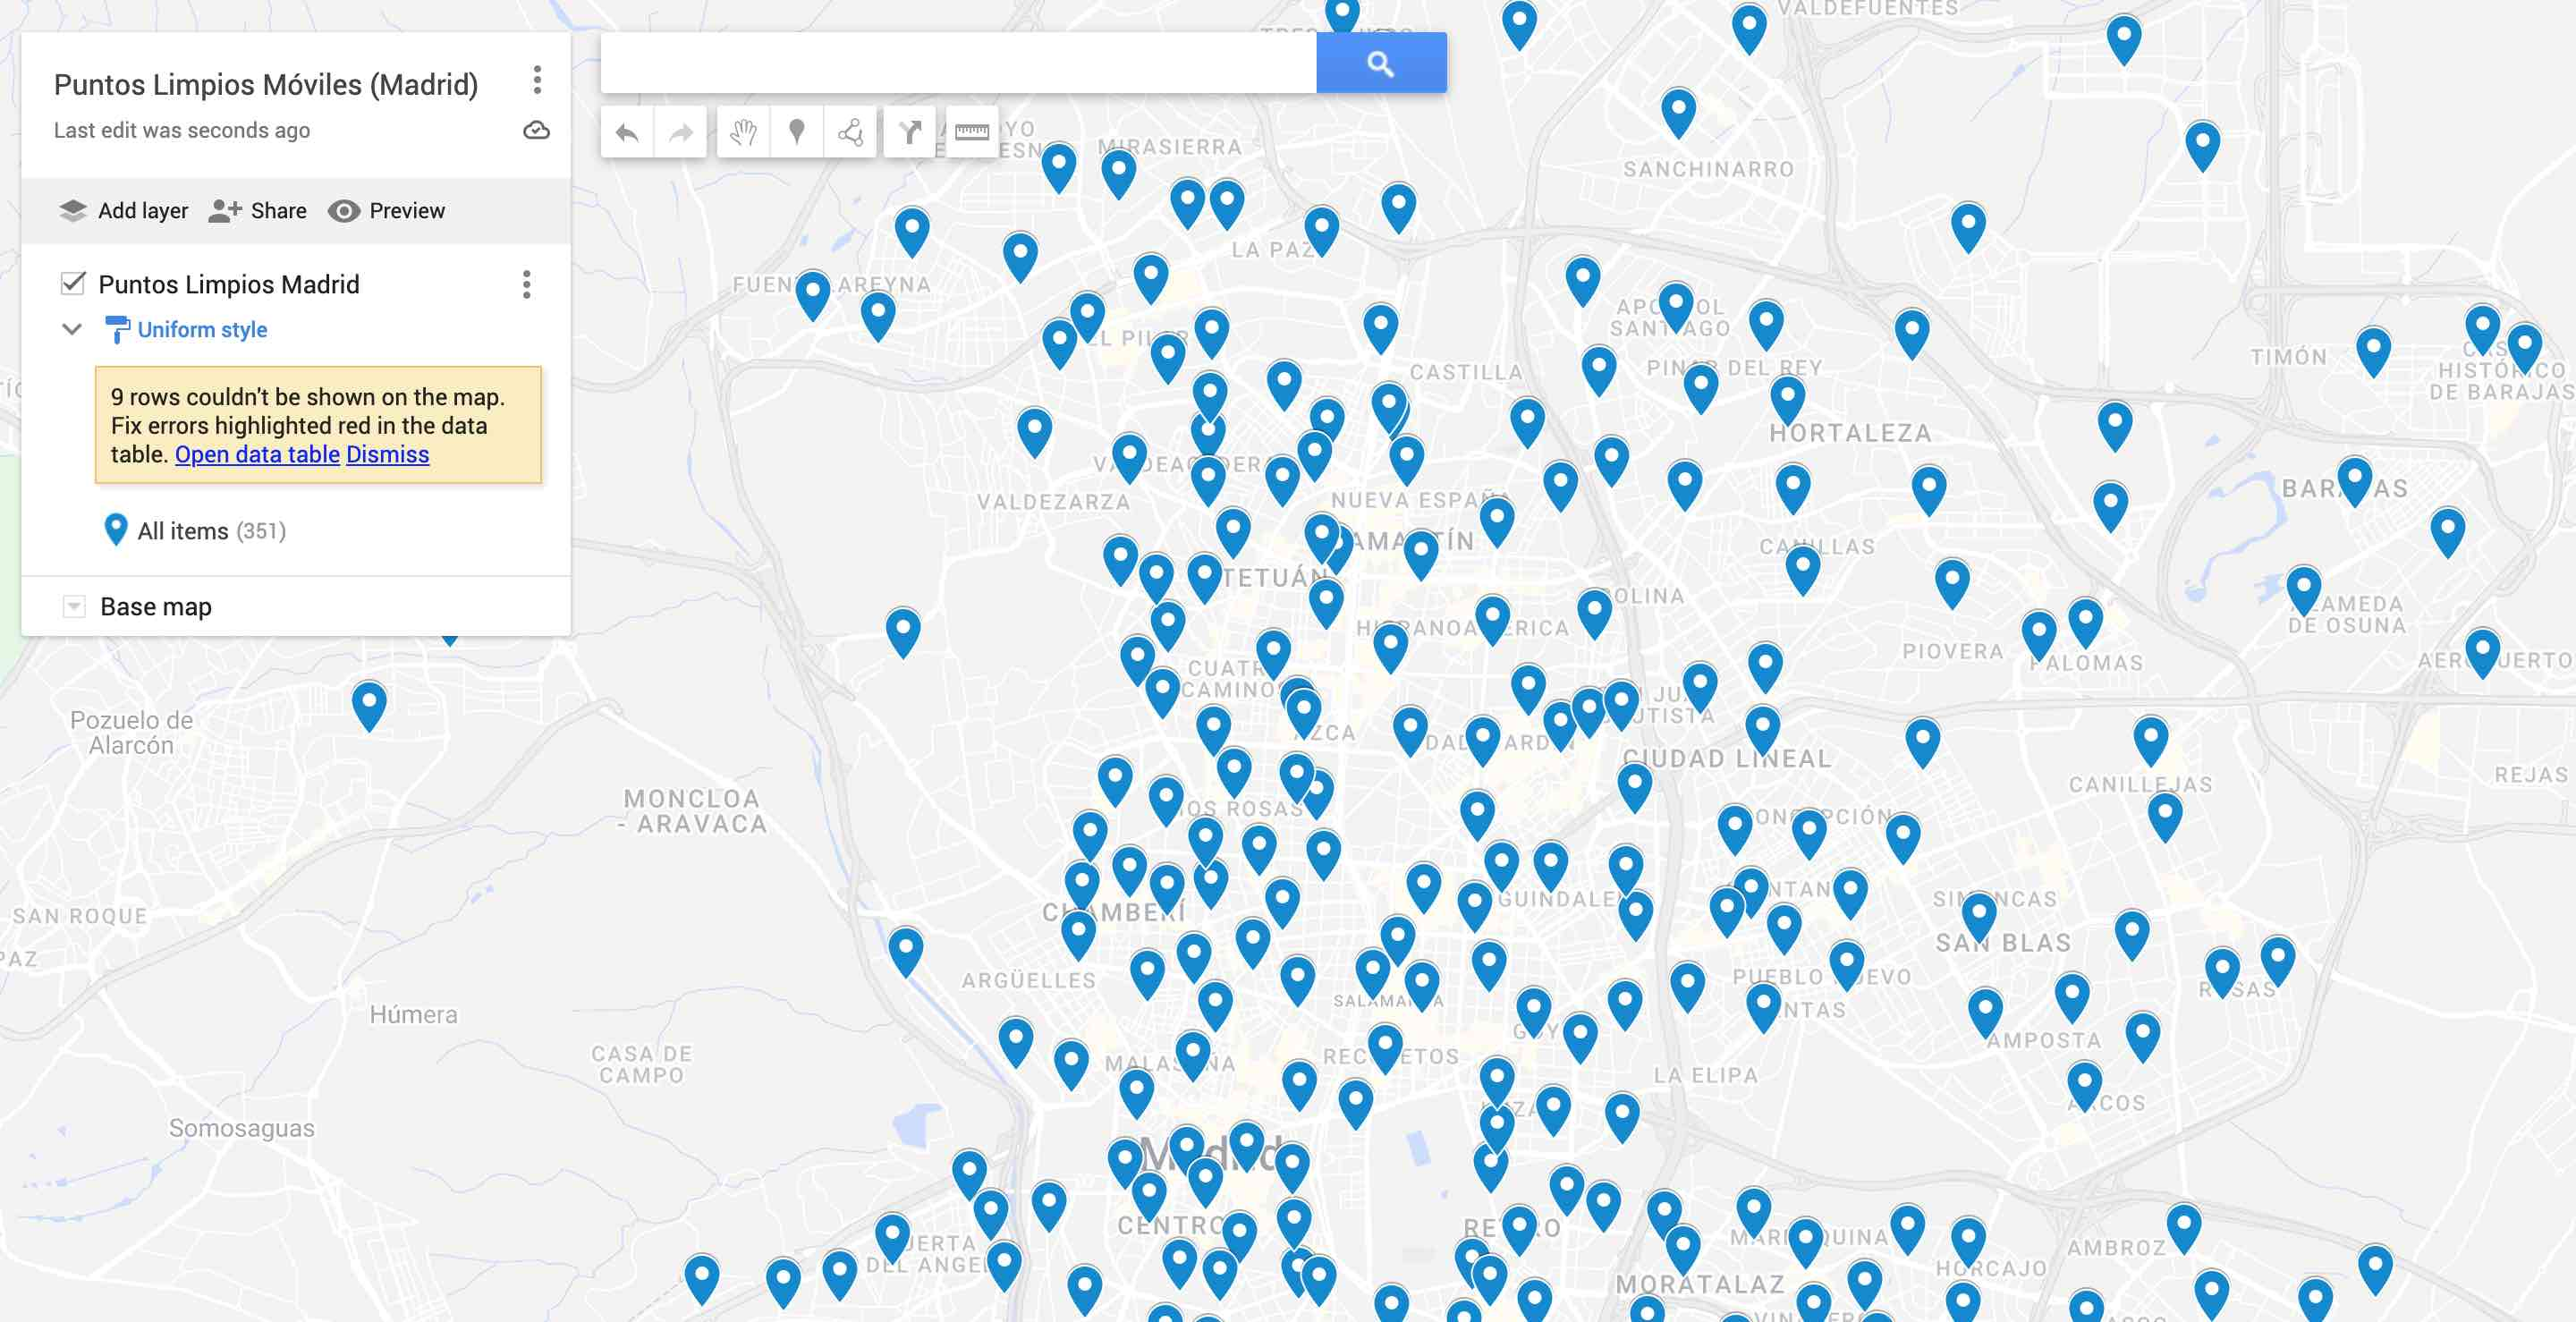

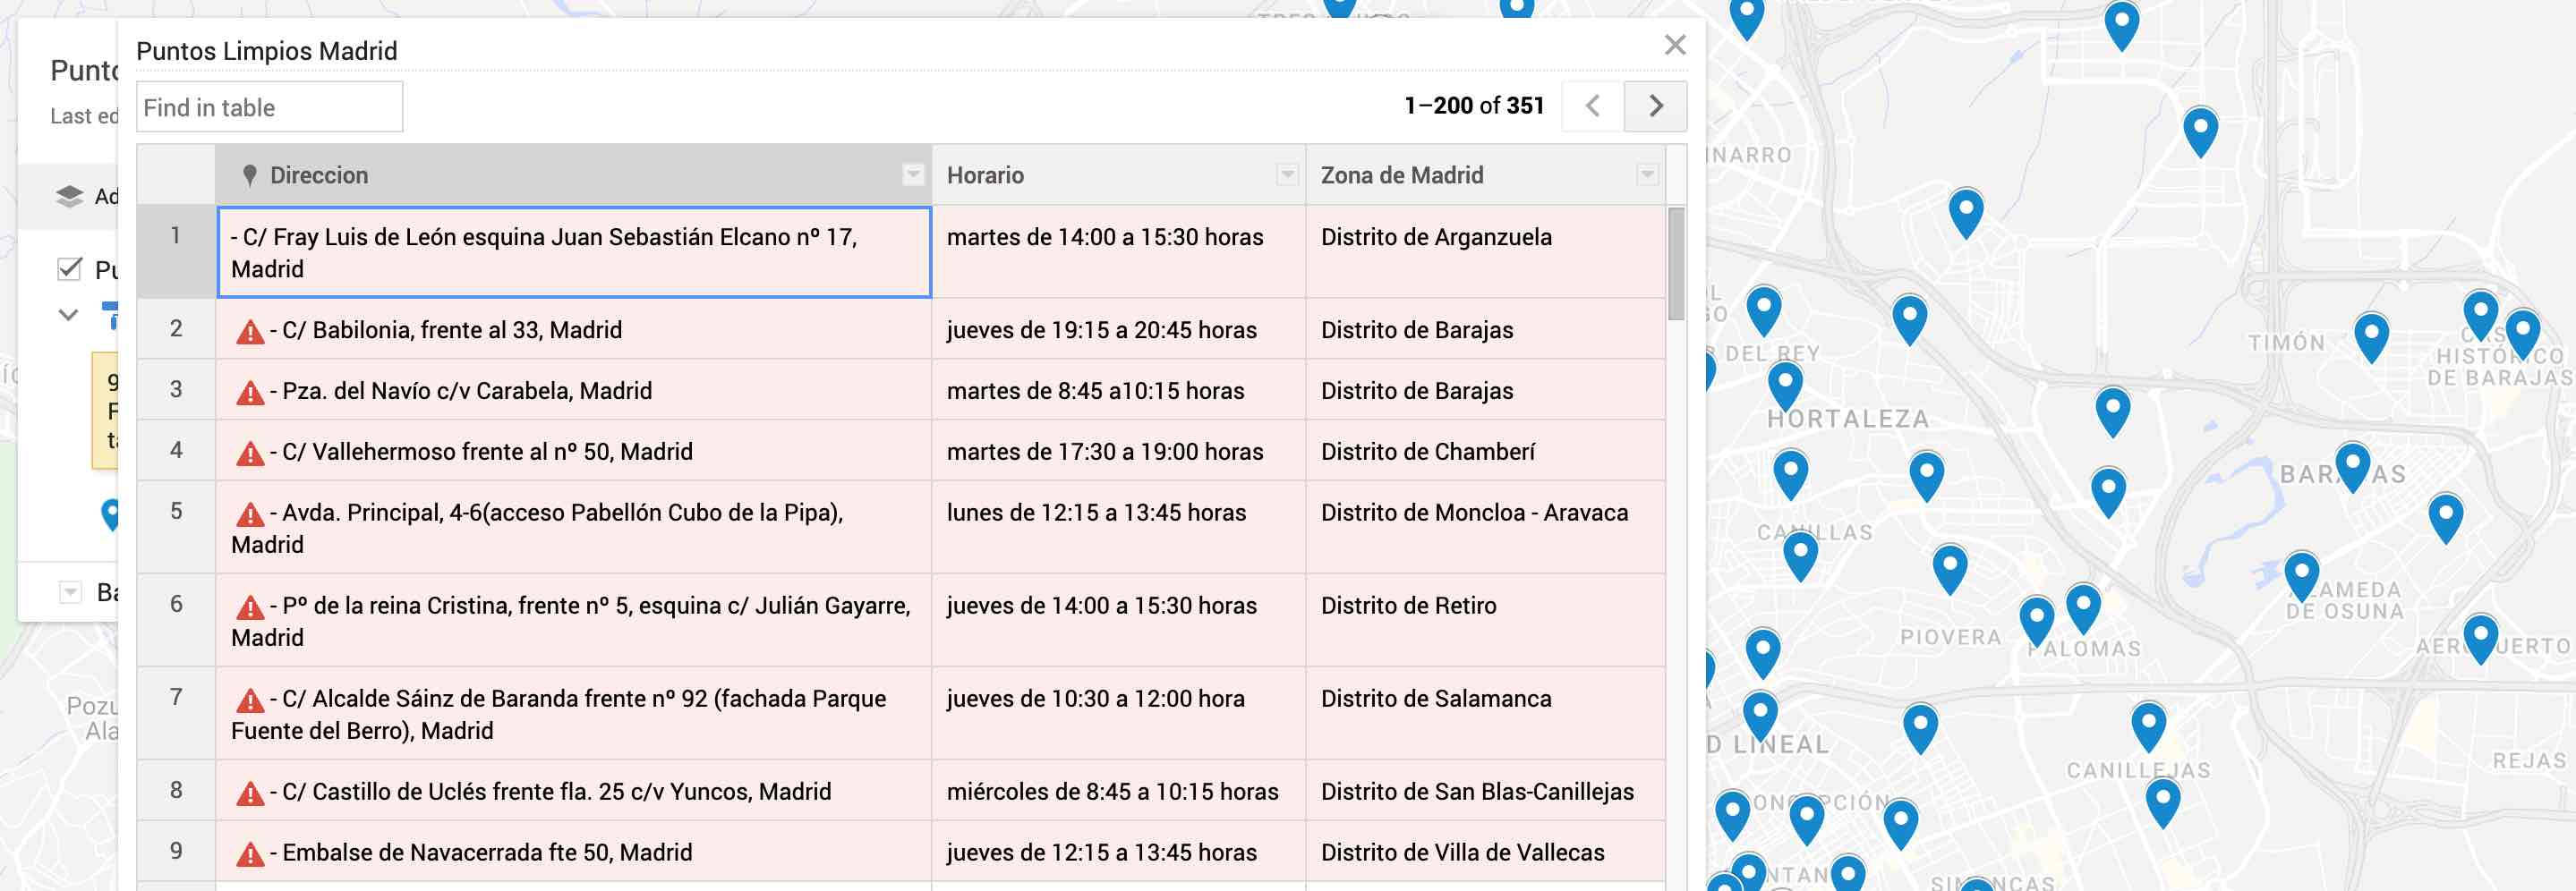

We clean it.

**Eh Voilà!**

[Google My Maps](https://www.google.com/maps/d/edit?mid=1q9QJFZwhU7u7SEzVtKl91xldSMFeXsE&usp=sharing)

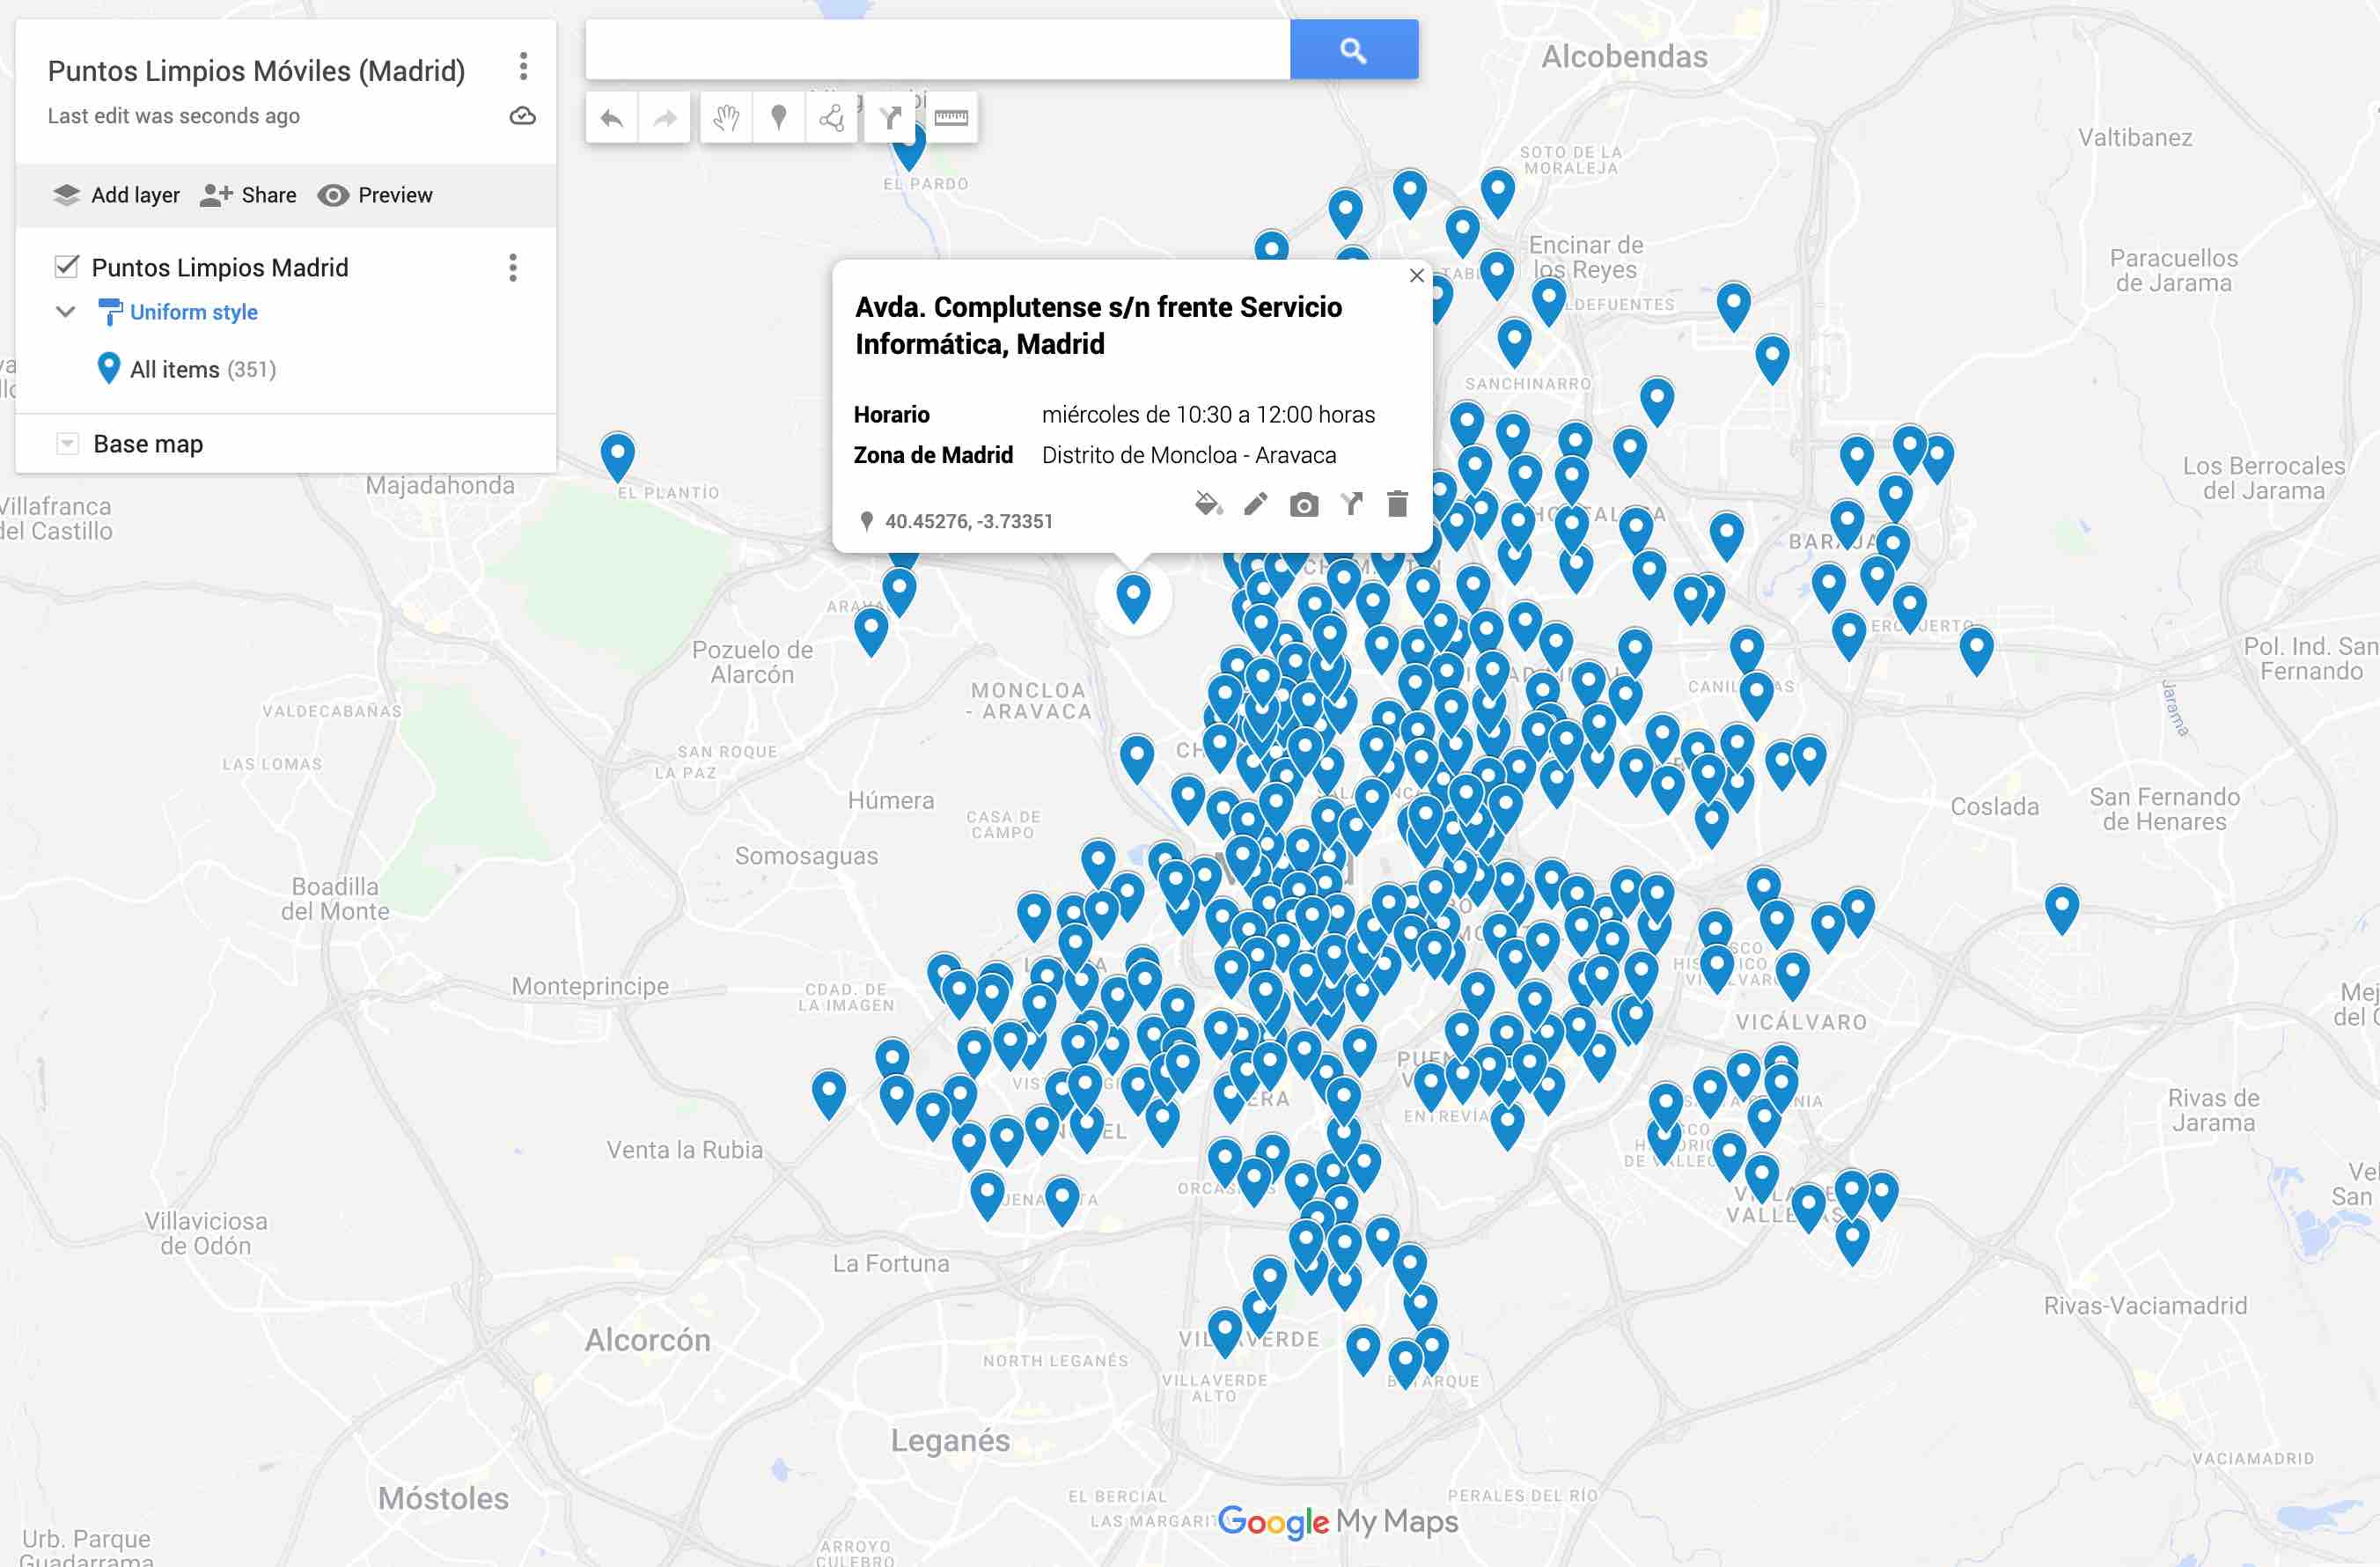

Finally, I added a layer grouped by days (but I couldn't find a way to sort the days)

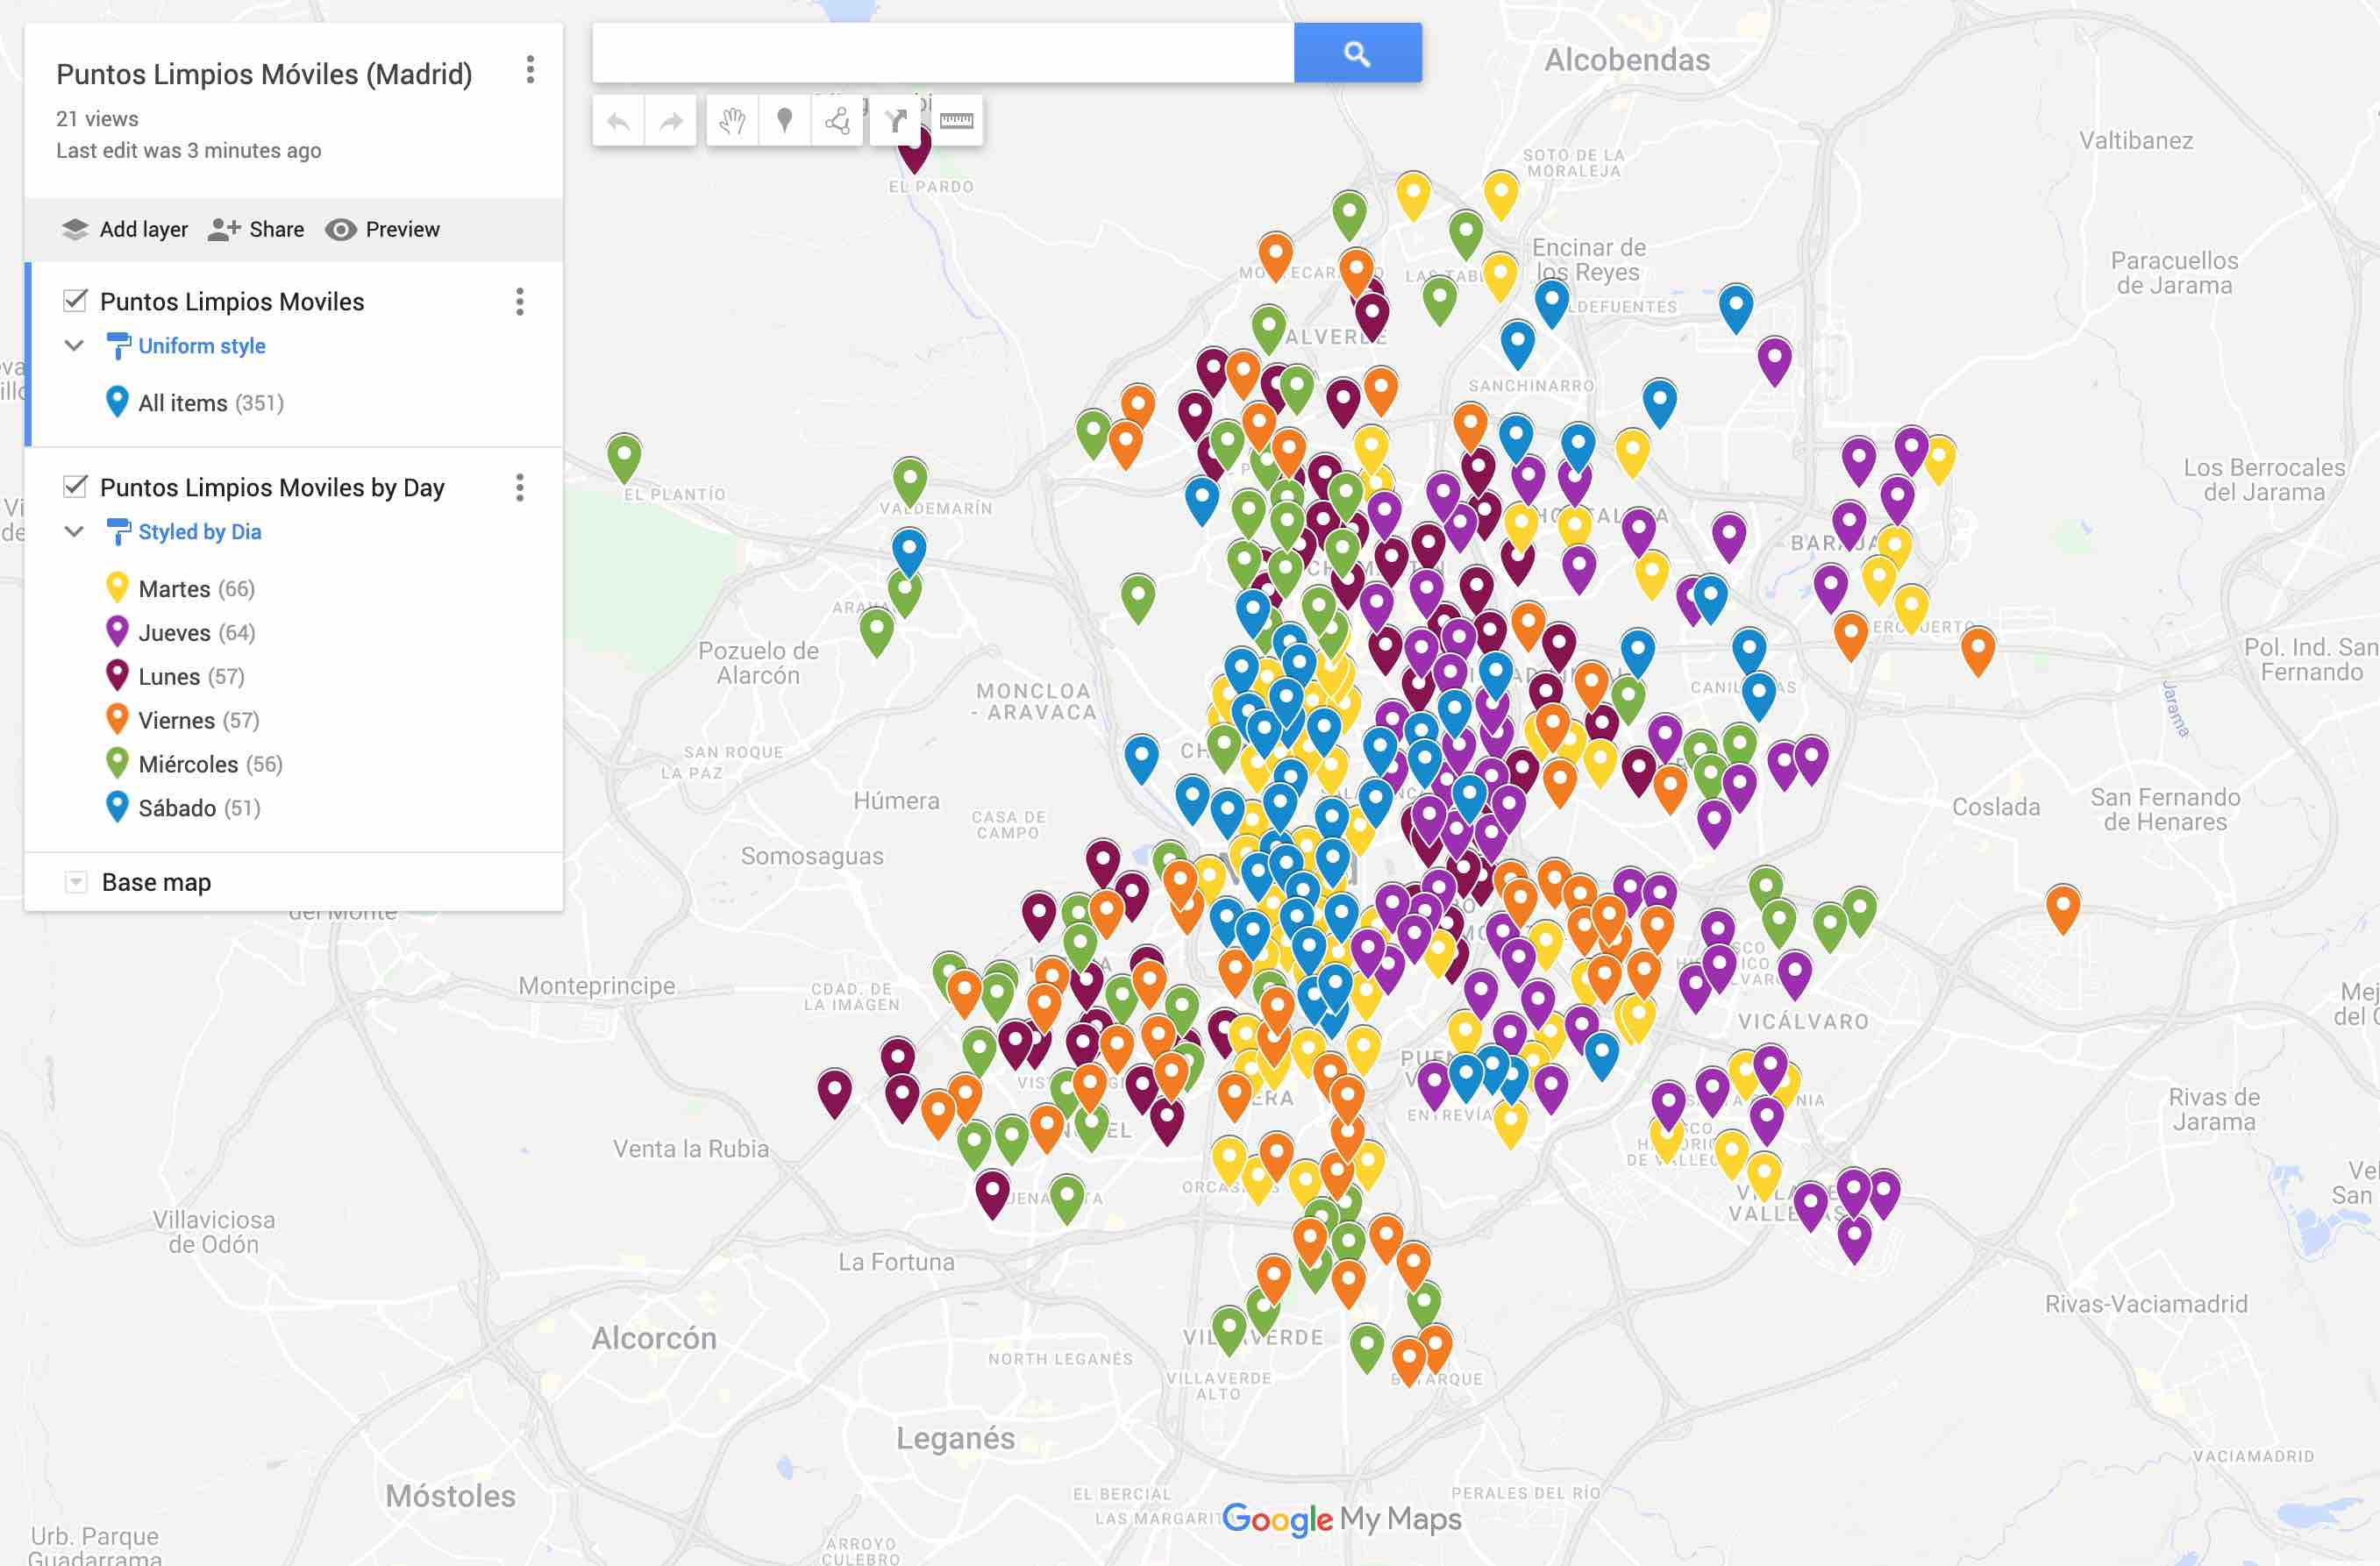

--------------------------------------------------------------------------------

## 2. Oficinas de la Agencia Tributaria (using web scraping)

Source data: [web](https://sede.agenciatributaria.gob.es/Sede/buscador-oficinas/madrid.html)

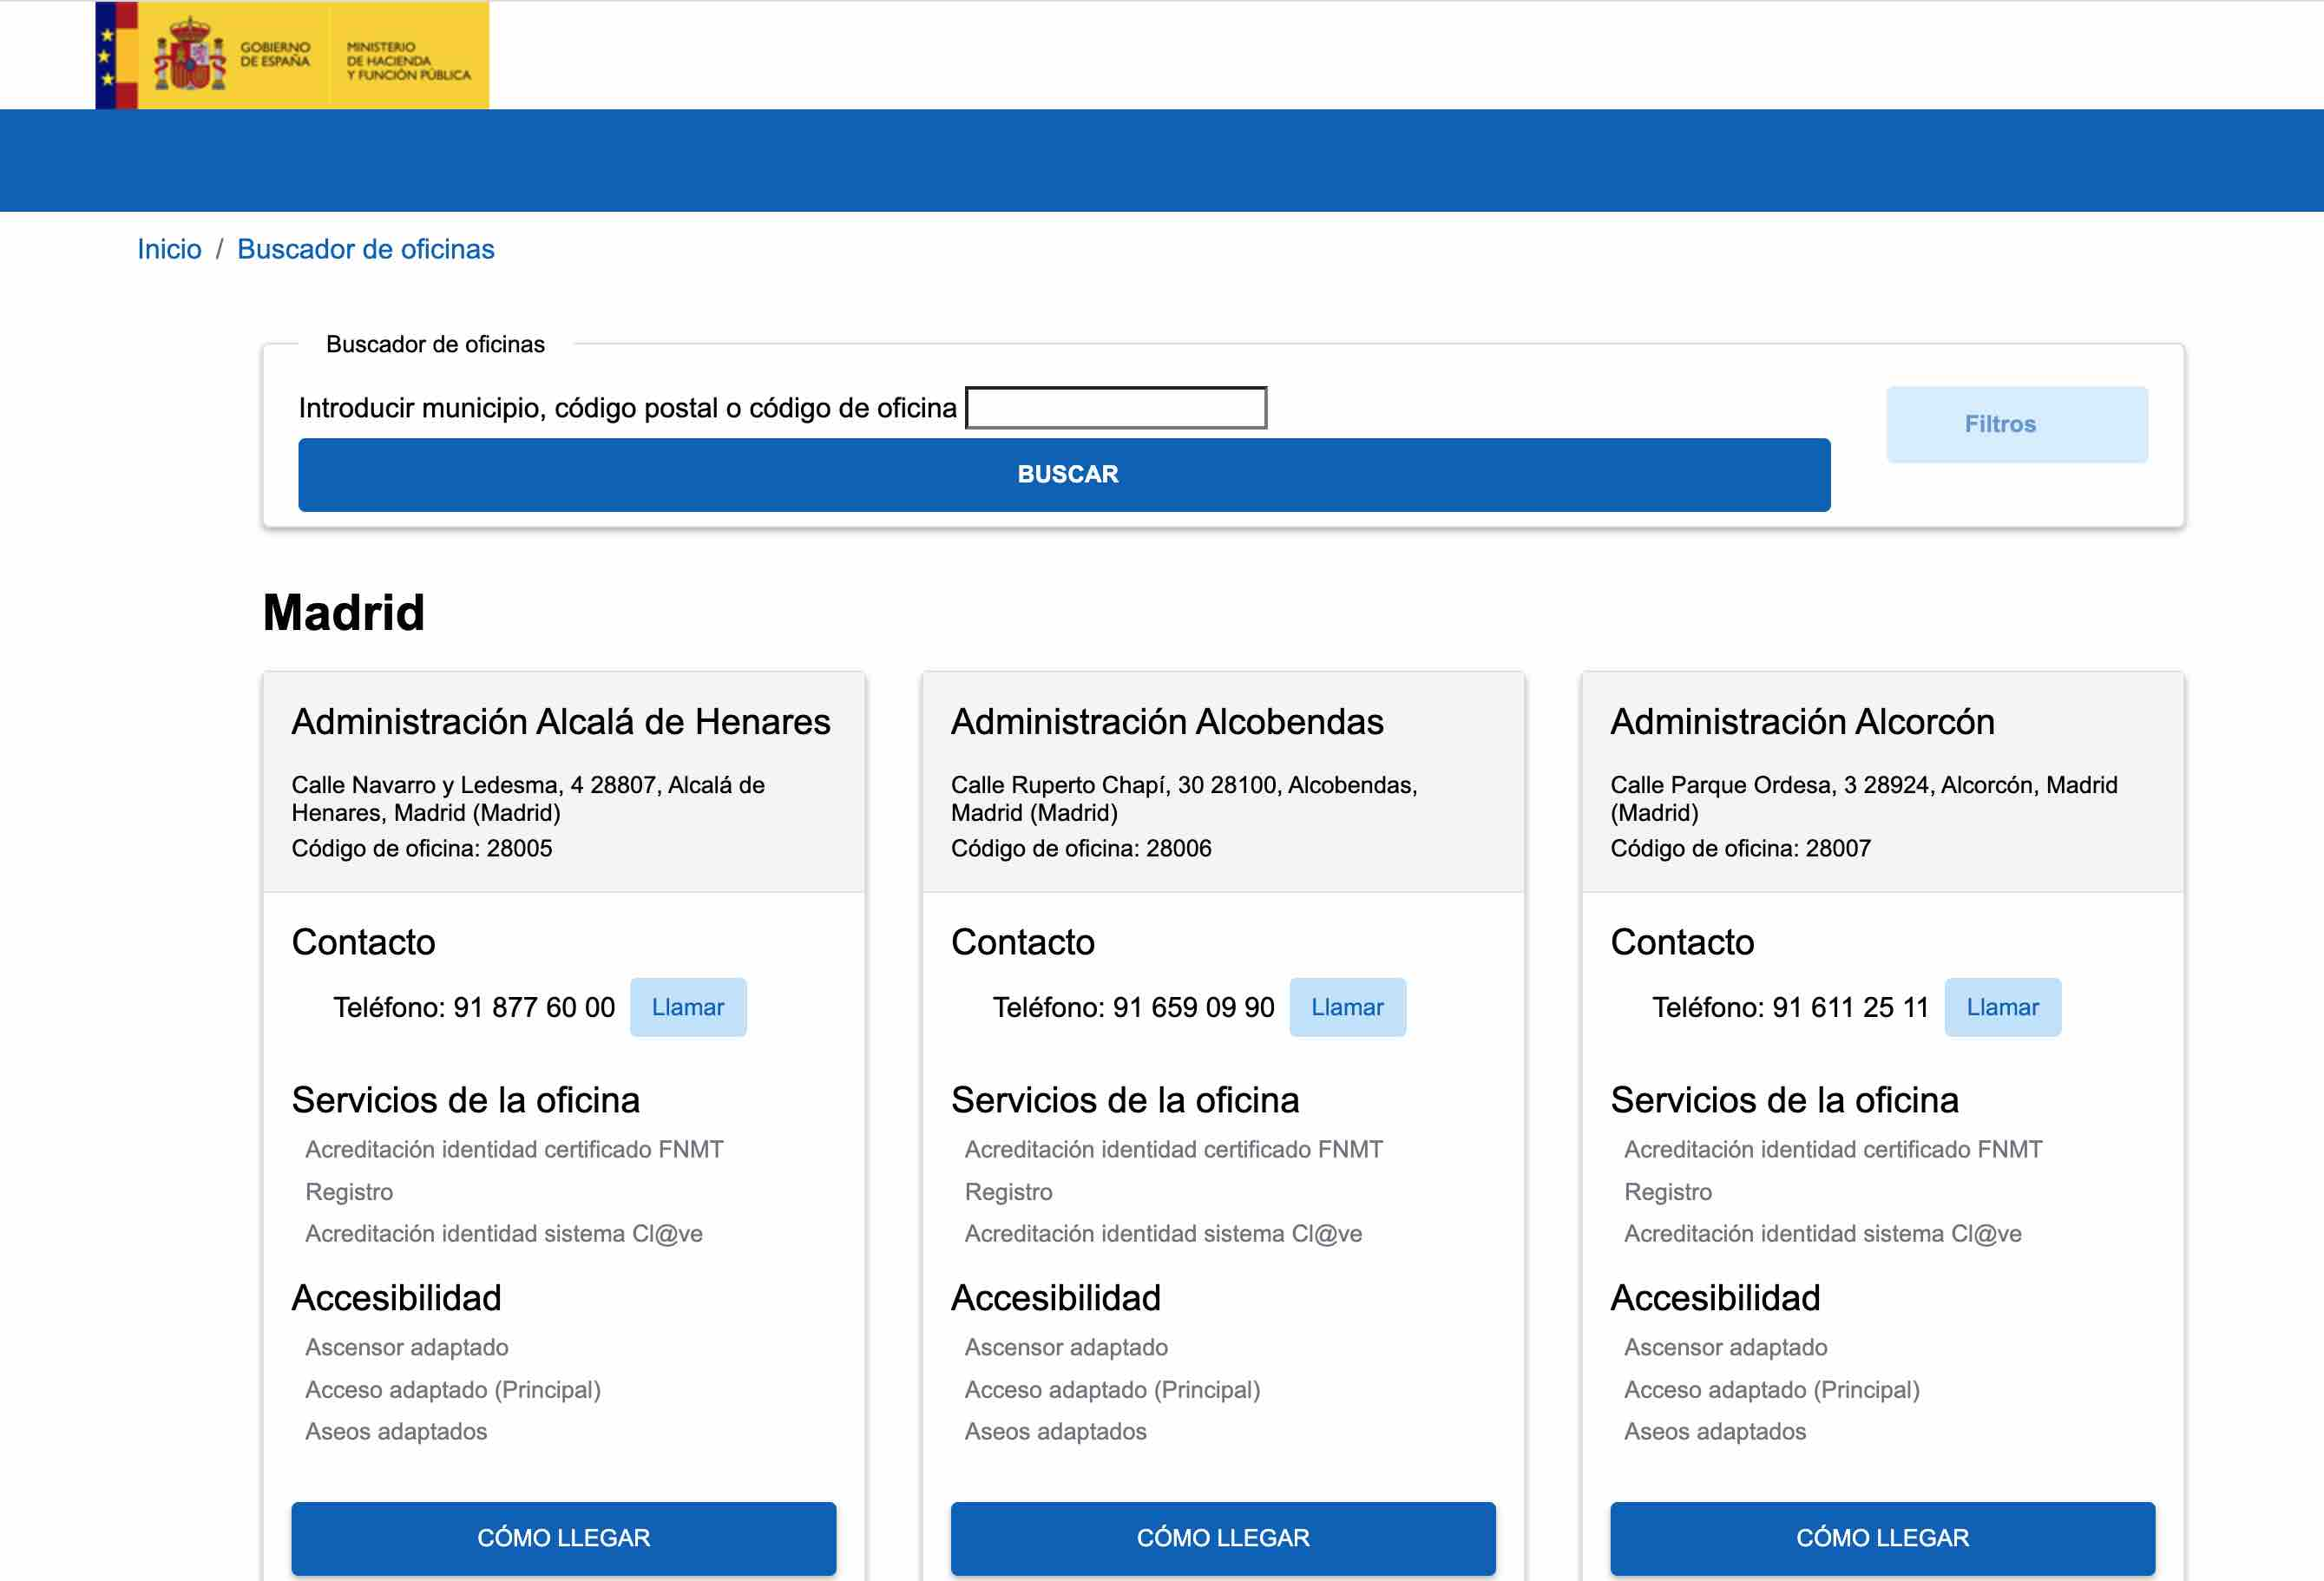

Python code to scrape data from this web.



In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
page = requests.get("https://sede.agenciatributaria.gob.es/Sede/buscador-oficinas/madrid.html")
page

In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
address = soup.find_all('address')

In [ ]:
address[0]

In [ ]:
df = pd.DataFrame(address)

In [ ]:
df.head()

In [ ]:
df.to_csv('df.csv', index=False)

--------------------------------------------------------------------------------

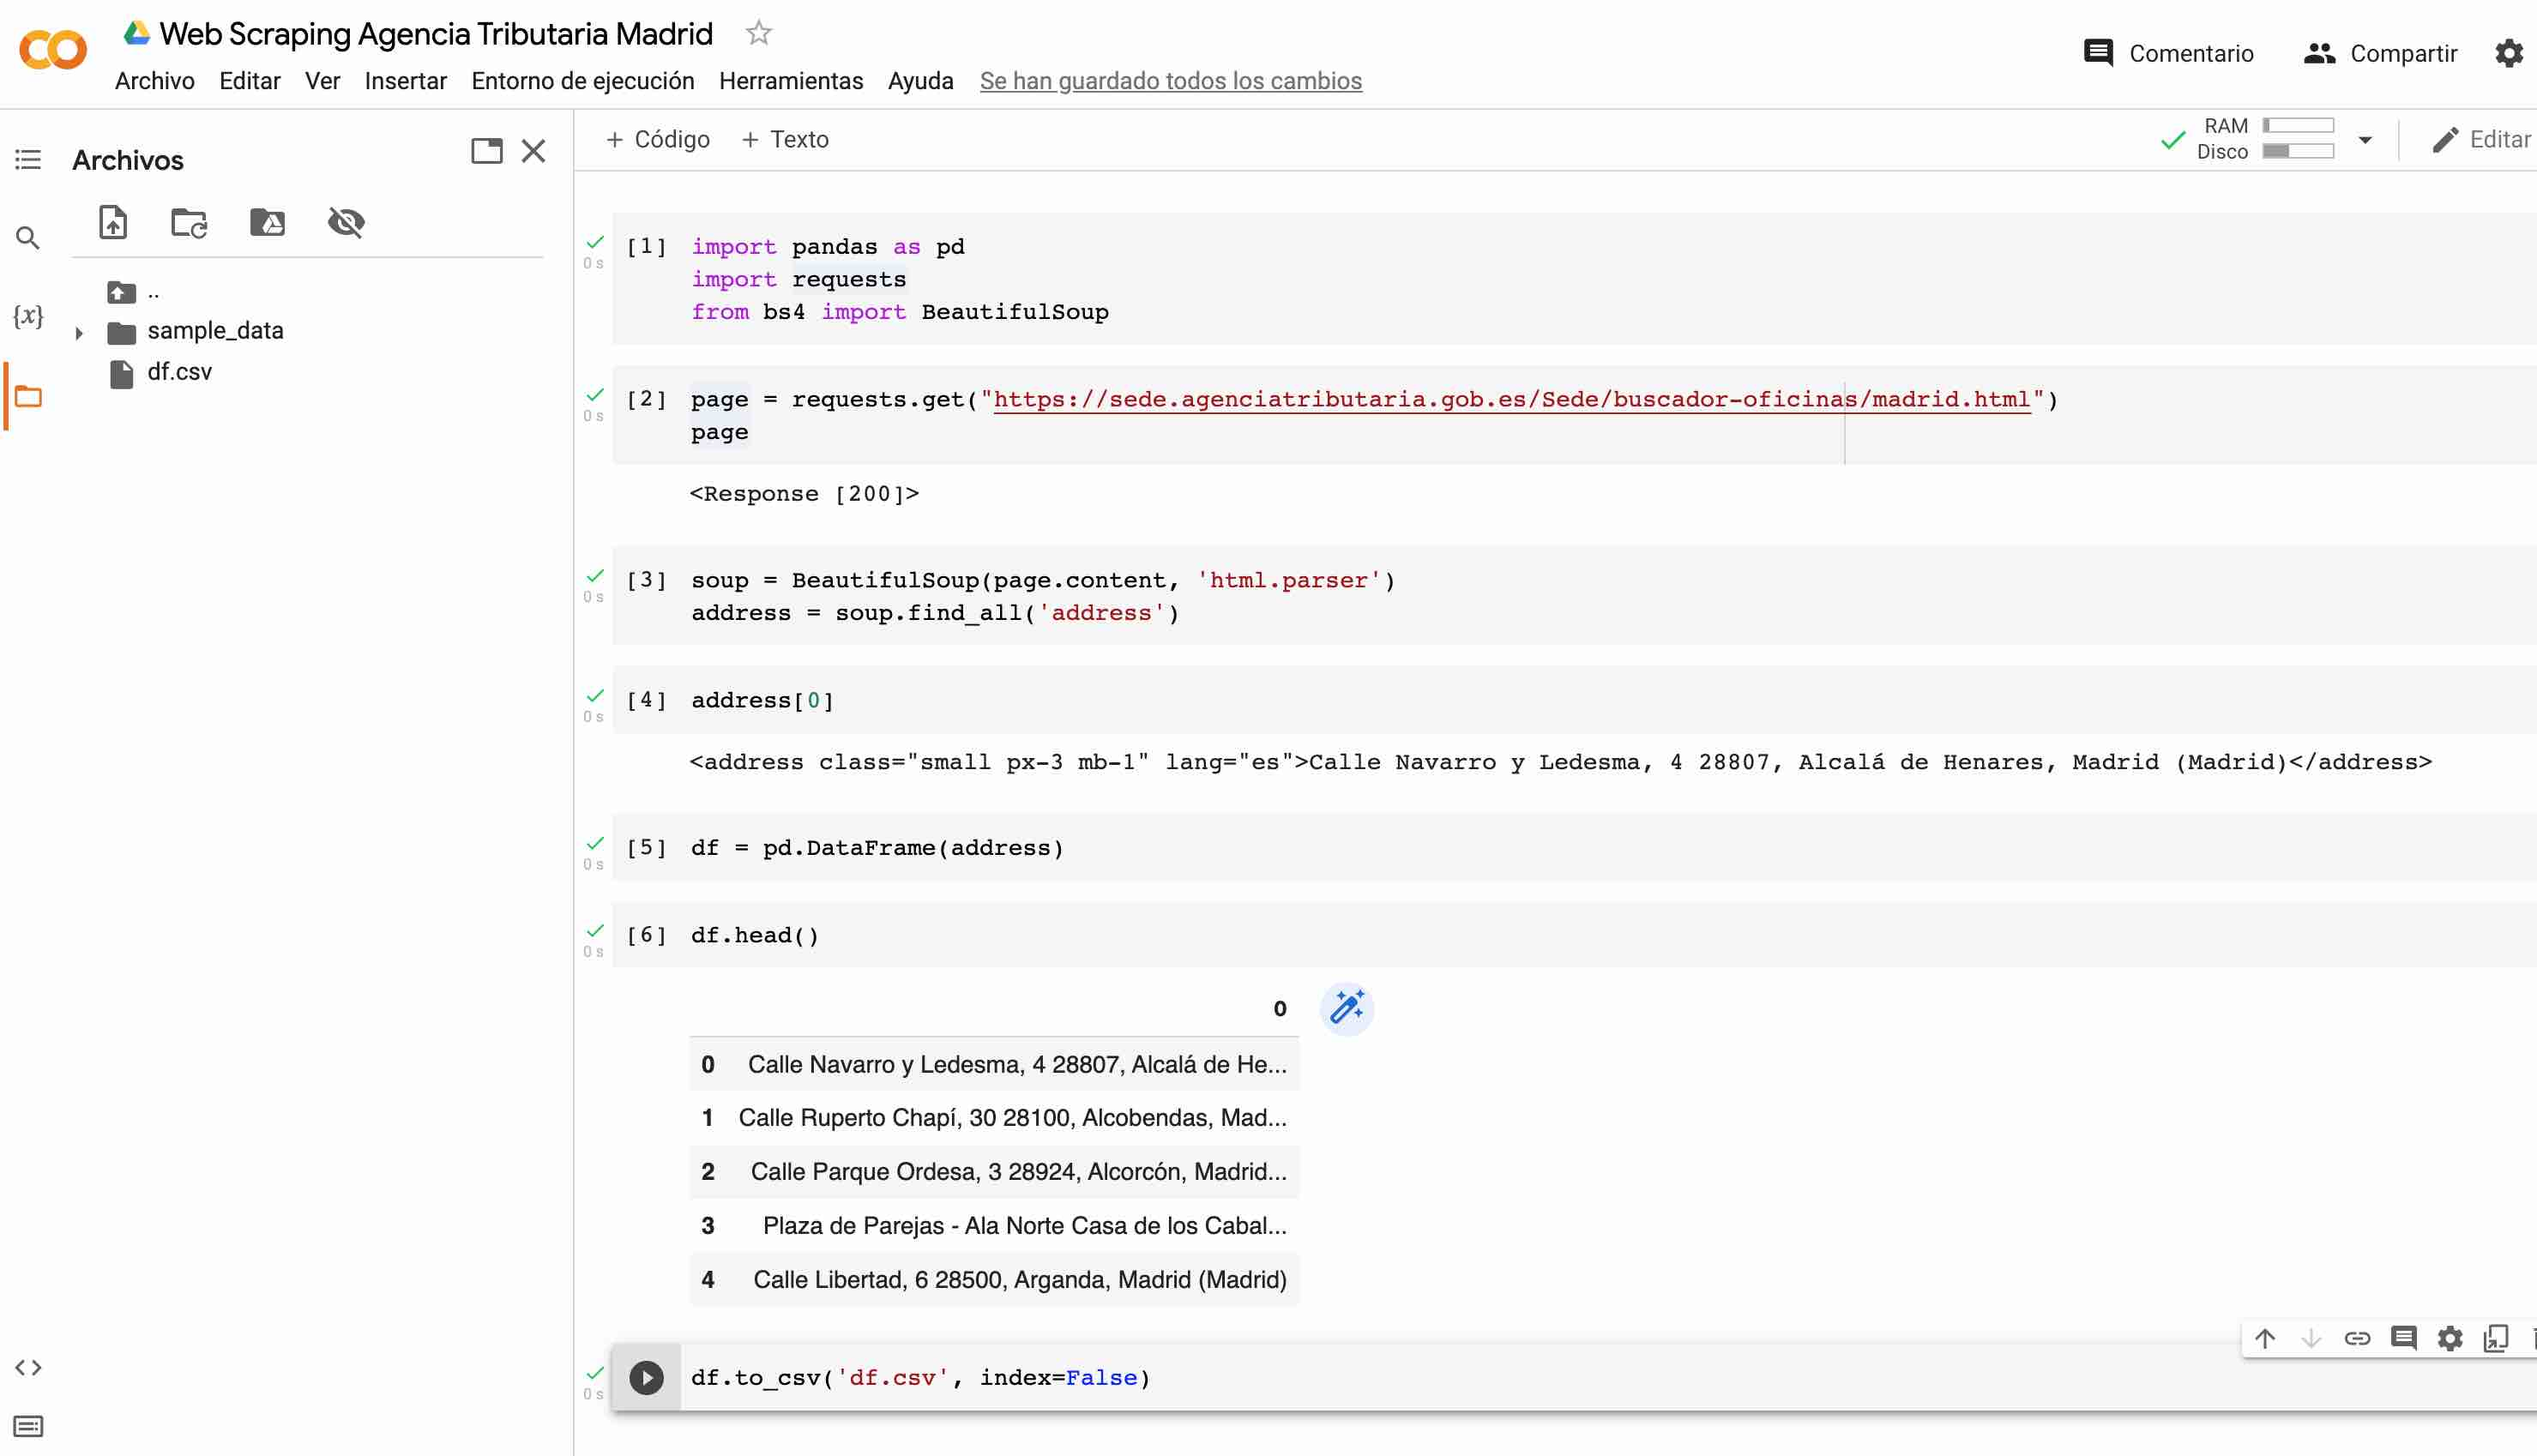

Downloaded the .csv file and cleaned it with Trifacta to see which column works best in Google My Maps (column 2 didn't recognize four addresses, column 1 just one)

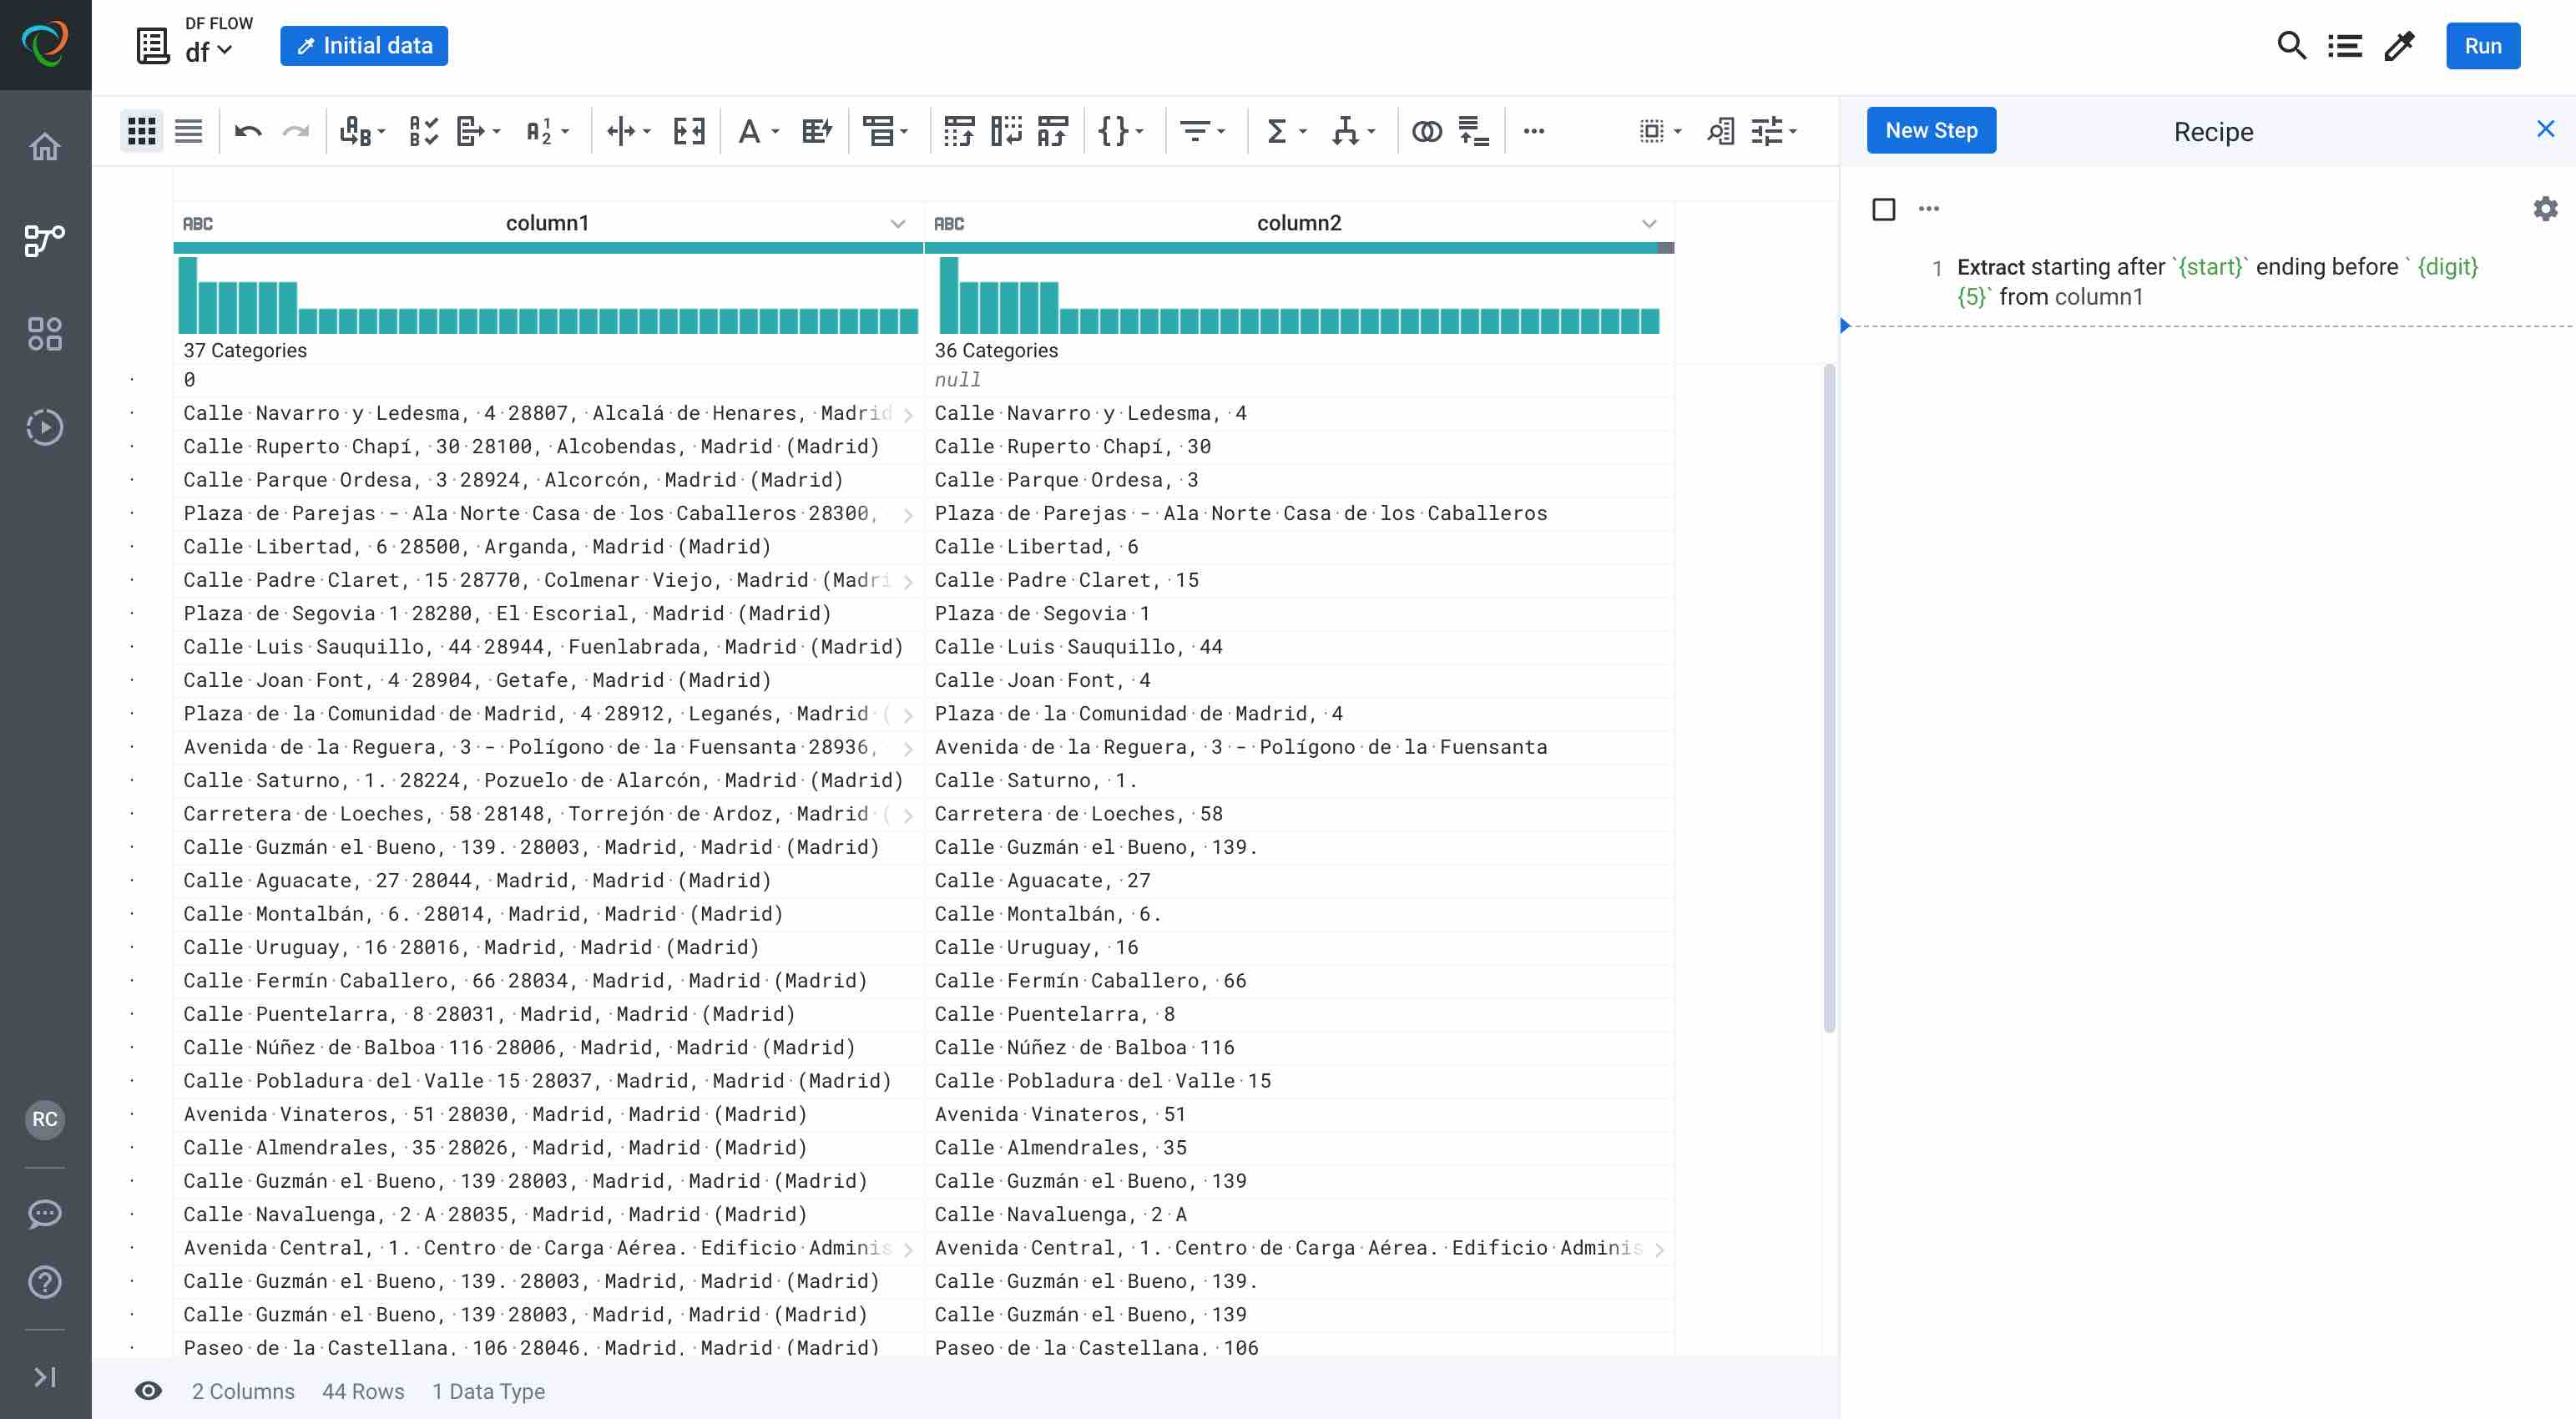

Exported the .csv file, imported it into Google Sheet, and connected it to Google My Maps.


[Google My Maps](https://www.google.com/maps/d/edit?mid=1ZU9gnpJEQYiAdvHhabdi12E4_wWUSzI&usp=sharing)

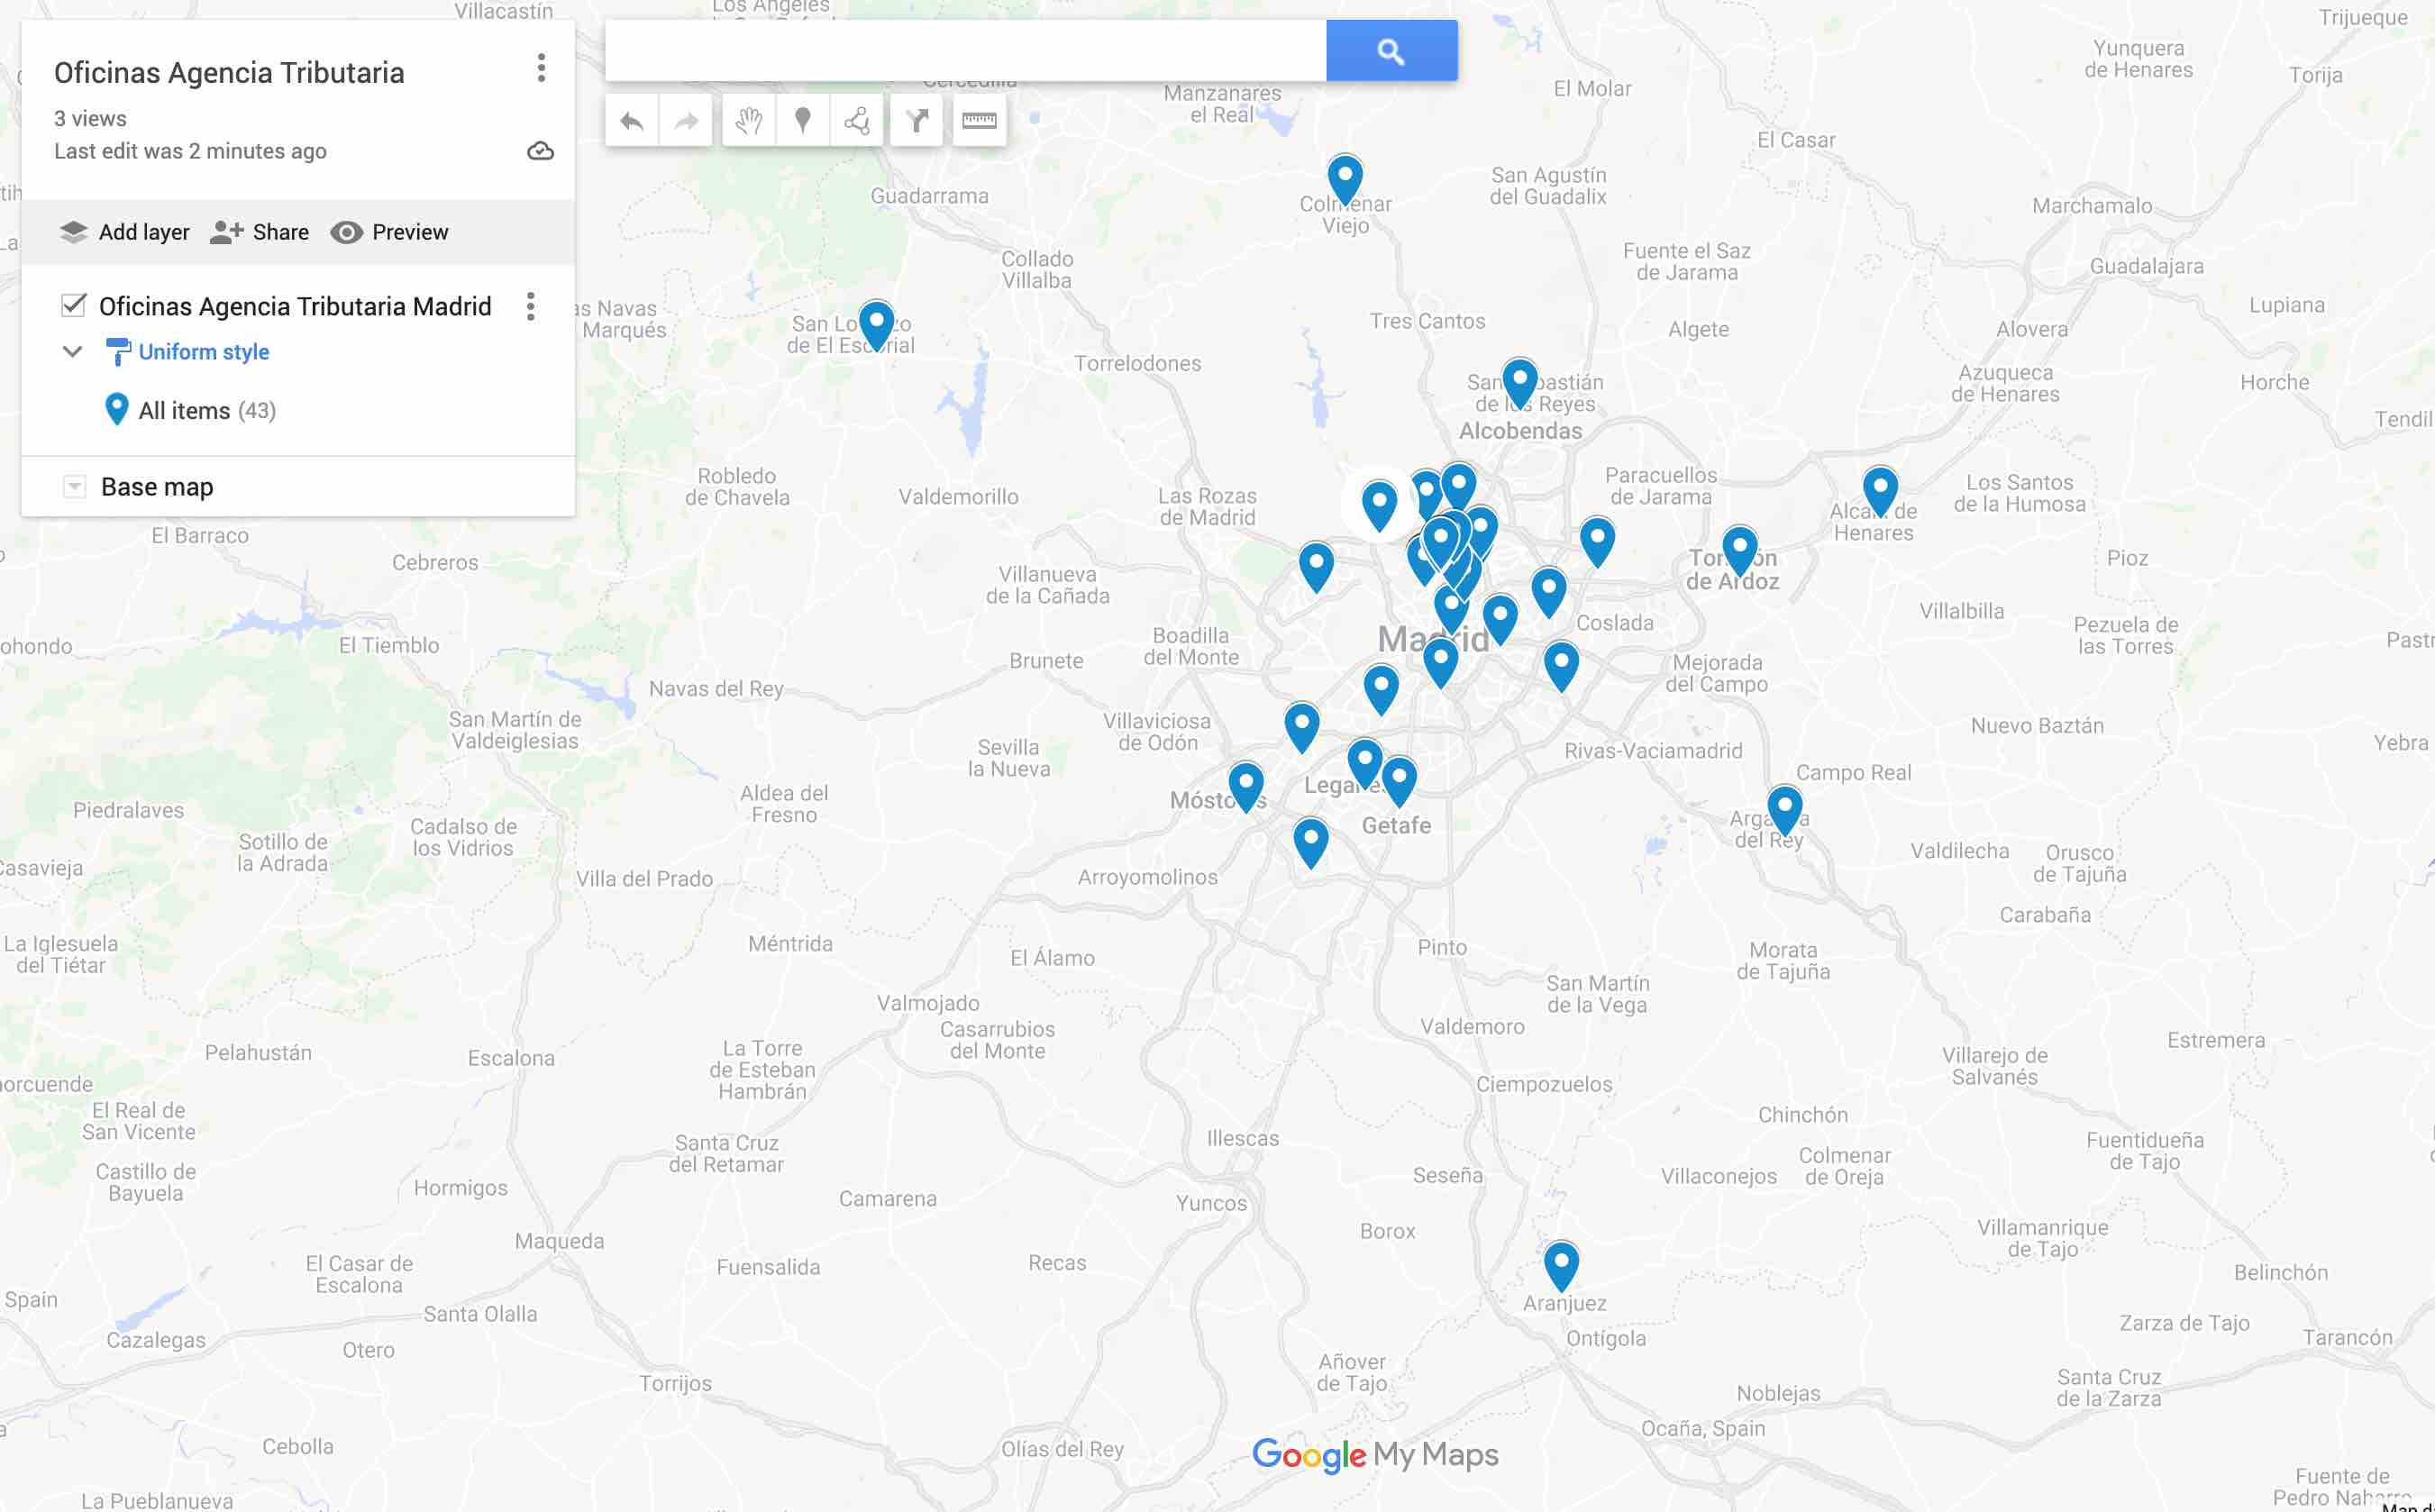